### Import the Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

### Importing the Data

In [2]:
raw_data = pd.read_csv("Index2018.csv")

In [3]:
df = raw_data.copy()

### Examining the Data

In [4]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
date      6269 non-null object
spx       6269 non-null float64
dax       6269 non-null float64
ftse      6269 non-null float64
nikkei    6269 non-null float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


**Date -> Date,
  spx -> S&P 500 USA Market index,
  dax -> Dax 30 Germany Market index,
  ftse -> FTSE 100 UK Market Index,
  nikkei -> NIKKEI Japan 225 Market Index**

In [6]:
df.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

In [7]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [8]:
df.isnull().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Plotting the Data

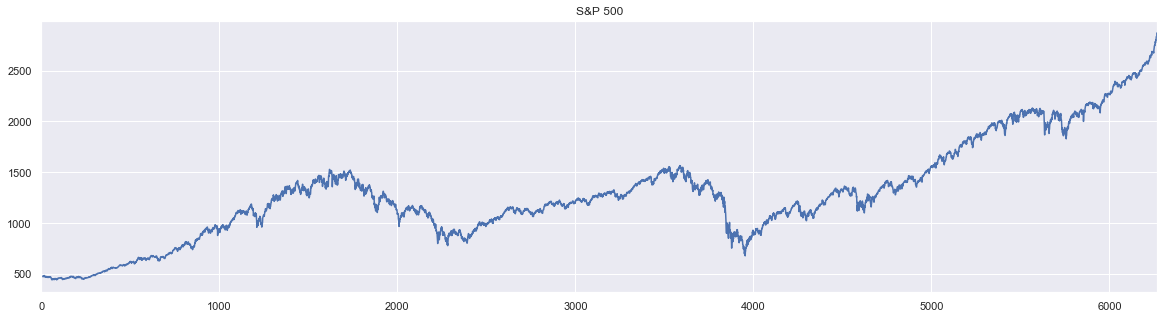

In [9]:
df.spx.plot(figsize=(20,5),title="S&P 500")

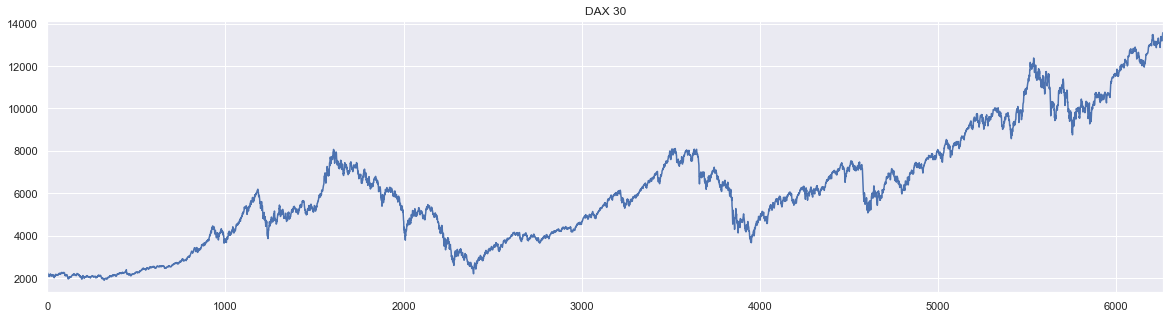

In [10]:
df.dax.plot(figsize=(20,5),title="DAX 30")

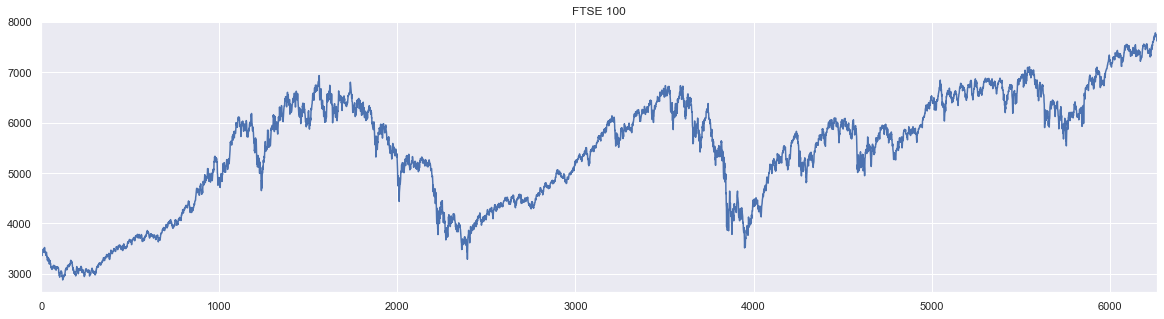

In [11]:
df.ftse.plot(figsize=(20,5),title="FTSE 100")

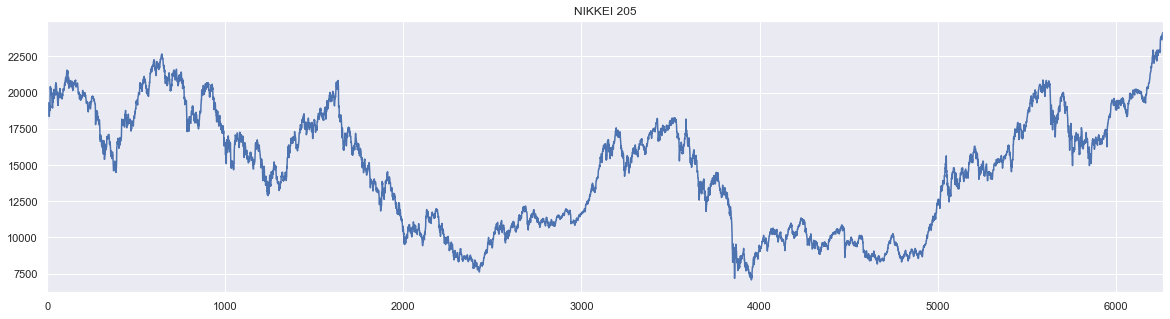

In [12]:
df.nikkei.plot(figsize=(20,5),title="NIKKEI 205")

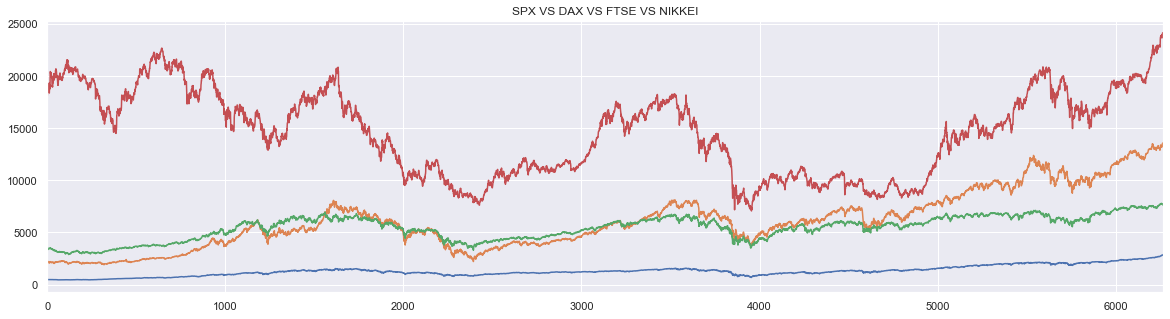

In [13]:
plt.figure(figsize=(20,5))
df.spx.plot()
df.dax.plot()
df.ftse.plot()
df.nikkei.plot()
plt.title("SPX VS DAX VS FTSE VS NIKKEI")
plt.show()

### The QQ Plot

In [14]:
import scipy.stats
import pylab

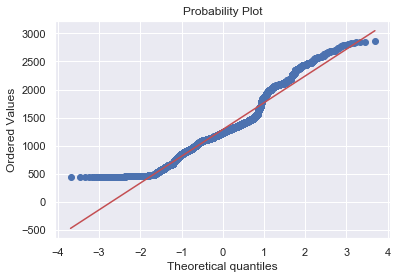

In [15]:
scipy.stats.probplot(df.spx,plot=pylab)
pylab.show()

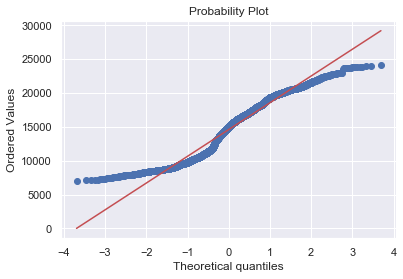

In [16]:
scipy.stats.probplot(df.nikkei,plot=pylab)
pylab.show()

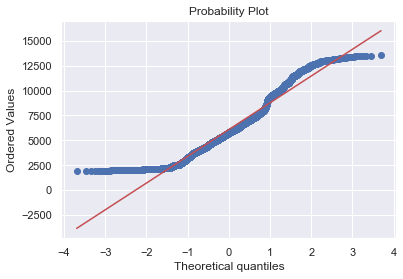

In [17]:
scipy.stats.probplot(df.dax,plot=pylab)
pylab.show()

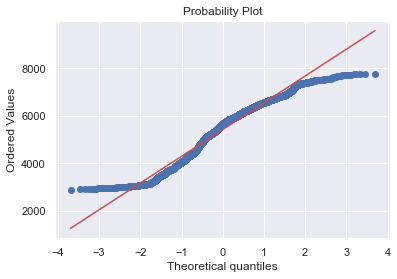

In [18]:
scipy.stats.probplot(df.ftse,plot=pylab)
pylab.show()

### Convert date to datetime

In [19]:
df.date = pd.to_datetime(df.date,dayfirst=True)

In [20]:
print(df.date.dtypes)

datetime64[ns]


### Check the time period

In [21]:
df.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [22]:
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


### Setting up date as index

In [23]:
df.set_index("date",inplace=True)

In [24]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Setting up frequency

In [25]:
df = df.asfreq('b')

In [26]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [27]:
df.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

### Fill the missing values

In [28]:
# Fill the missing value to the last known value of this collumn
df.spx = df.spx.fillna(method="ffill")
df.dax = df.dax.fillna(method="ffill")
df.ftse = df.ftse.fillna(method="ffill")
df.nikkei = df.nikkei.fillna(method="ffill")

In [29]:
df.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Simplify the data

In [30]:
# Lets create a column for market value of ftse
df["market_value"]=df.spx

In [31]:
df.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469.90
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27
1994-01-11,474.13,2228.10,3413.77,18485.25,474.13
1994-01-12,474.17,2182.06,3372.02,18793.88,474.17
1994-01-13,472.47,2142.37,3360.01,18577.26,472.47


In [32]:
### Lets remove the collumn except market_value
del df["spx"],df["dax"],df["ftse"],df["nikkei"]

In [33]:
df.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


### Spliting data train and test

In [34]:
size = int(len(df)*.80)

In [35]:
train = df.iloc[:size] # 80% of train data

In [36]:
test = df.iloc[size:] # 20% of test data

In [37]:
train.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [38]:
test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


### White Noise

In [39]:
wn = np.random.normal(loc=train.market_value.mean(),scale=train.market_value.std(),size=len(train))

In [40]:
# Lets add column in the train data set
train["wn"] = wn

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
train.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1087.398335
std,292.559287,291.555661
min,438.920000,-11.880783
25%,914.620000,892.685675
50%,1144.650000,1085.631794
75%,1316.280729,1284.761278
max,1570.252238,2225.893739


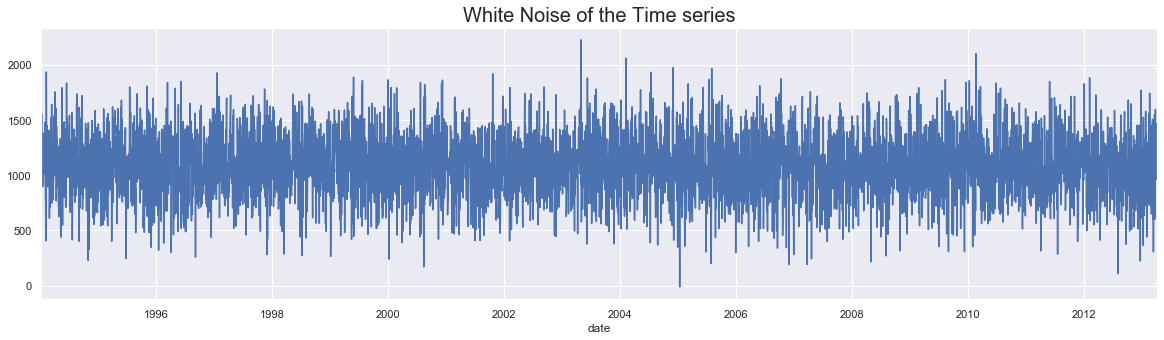

In [42]:
# Plot the white noise
train.wn.plot(figsize=(20,5))
plt.title("White Noise of the Time series",size=20)
plt.show()

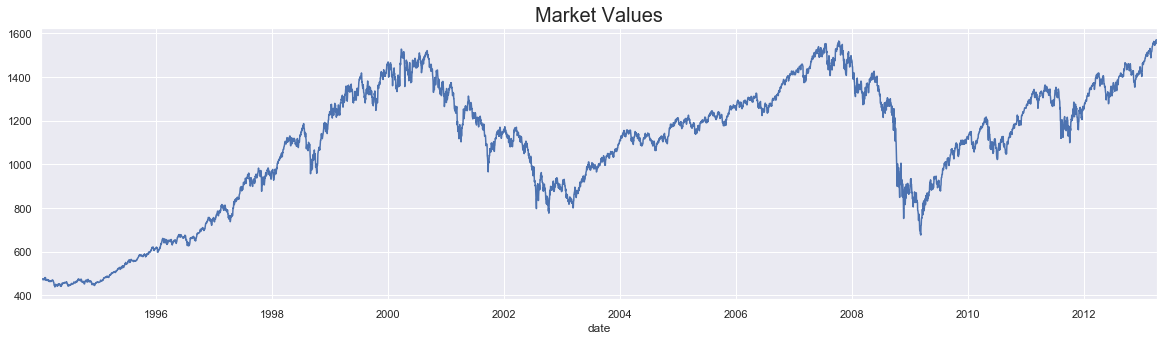

In [43]:
# Plot the market value
train.market_value.plot(figsize=(20,5))
plt.title("Market Values",size=20)
#plt.ylim(1000,9025) # Scale as the same of white noise
plt.show()

### Random Walk

In [44]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date,dayfirst=True)
rw.set_index("date",inplace=True)
rw = rw.asfreq("b")

In [45]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [46]:
train["rw"]=rw.price

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
train.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,795.190887,1122.139662
1994-01-10,475.27,1163.758726,1080.347860
1994-01-11,474.13,1557.193838,1082.095245
1994-01-12,474.17,1109.953943,1083.639265
1994-01-13,472.47,1132.026489,1067.146255


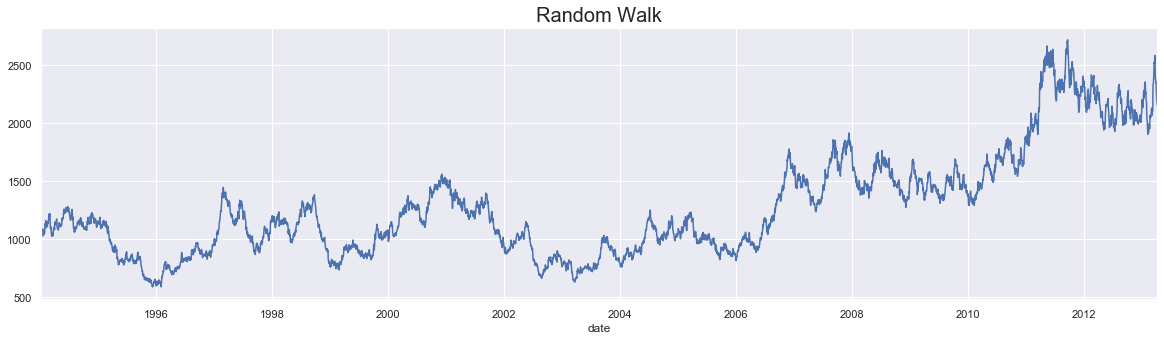

In [48]:
# Plot the Random walk
train.rw.plot(figsize=(20,5))
plt.title("Random Walk",size=20)
plt.show()

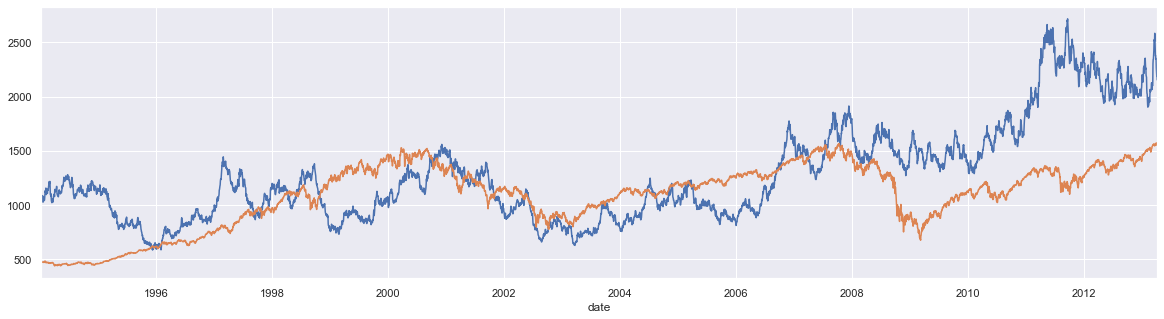

In [49]:
# Lets plot rw and market_value together
plt.figure(figsize=(20,5))
train.rw.plot()
train.market_value.plot()
plt.show()

### Stationarity

In [50]:
# Import necessary package
import statsmodels.tsa.stattools as sts

In [51]:
# Dicky-Fuller test for market value
sts.adfuller(train.market_value)

(-1.7369847452352423,
 0.41216456967706283,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

**Critical value of dicky-fuller test : -1.7369847452352423,   P-value associated with t-stats :  0.41216456967706283,  Number of lags used regression : 18,   Number of observation used in the analysis : 5002**


In [52]:
# Dicky-Fuller test for White Noise
sts.adfuller(train.wn)

(-70.82327980962759,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70775.1717545942)

In [53]:
# Dicky-Fuller test for random walk
sts.adfuller(train.rw)

(-1.3286073927689714,
 0.6159849181617386,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonility

In [54]:
# Import package
from statsmodels.tsa.seasonal import seasonal_decompose

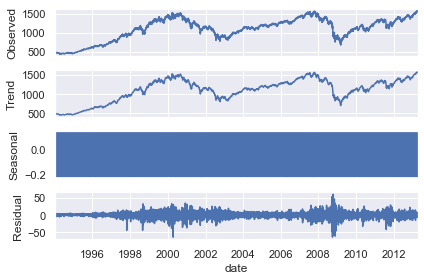

In [55]:
# Additive seasonal decompose of market value
s_dec_additive = seasonal_decompose(train.market_value,model="additive")

# Lets plot this
s_dec_additive.plot()
plt.show()

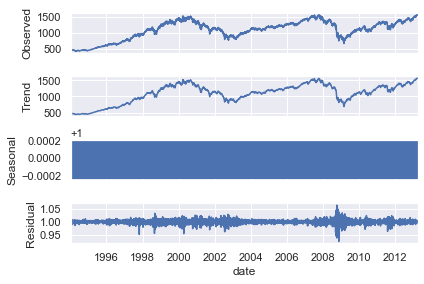

In [56]:
# Multiplicative seasonal decompose of market value
s_dec_multiplicative = seasonal_decompose(train.market_value,model="multiplicative")

# Lets plot this
s_dec_multiplicative.plot()
plt.show()

**Both decomposition seasonal sequence has no clear pattern and Trend closely represents as observed series So, There is no Seasonality among S&P**

### ACF (Autocorrelation Function)

In [57]:
# Import package
import statsmodels.graphics.tsaplots as sgt

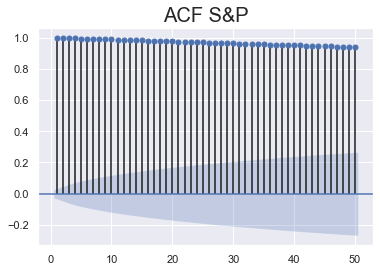

In [58]:
# ACF plot for market value
sgt.plot_acf(train.market_value,lags=50,unbiased=True,zero=False)
plt.title("ACF S&P",size=20)
plt.show()

**We see that there Autocorrelation of S&P price. Because in every lag there correlation with the previous lags**

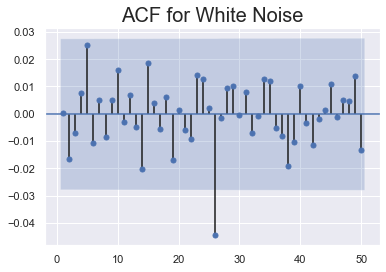

In [59]:
# ACF plot for White Noise
sgt.plot_acf(train.wn,lags=50,unbiased=True,zero=False)
plt.title("ACF for White Noise",size=20)
plt.show()

**No Autocorrelation of White Noise**

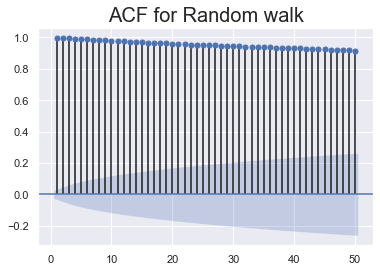

In [60]:
# ACF plot for Random Walk
sgt.plot_acf(train.rw,lags=50,unbiased=True,zero=False)
plt.title("ACF for Random walk",size=20)
plt.show()

**There ACF in Random walk**

### PACF(Partial AutoCorrelation Function)

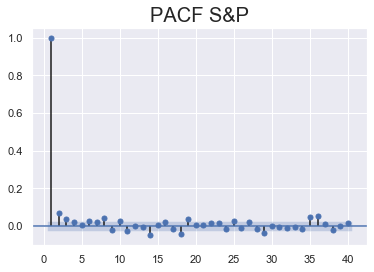

In [61]:
# PACF plot for Market value
sgt.plot_pacf(train.market_value,lags=40,zero=False,method=("ols"))
plt.title("PACF S&P",size=20)
plt.show()

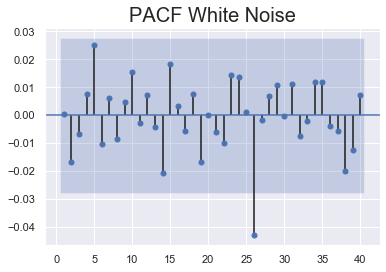

In [62]:
# PACF plot for White Noise
sgt.plot_pacf(train.wn,lags=40,zero=False,method=("ols"))
plt.title("PACF White Noise",size=20)
plt.show()

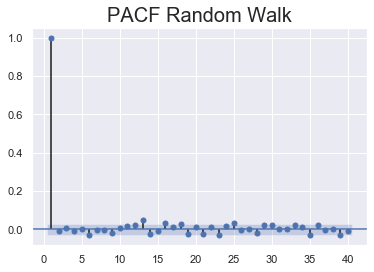

In [63]:
# PACF plot for Random Walk
sgt.plot_pacf(train.rw,lags=40,zero=False,method=("ols"))
plt.title("PACF Random Walk",size=20)
plt.show()

# Model Building

### Data Preprocessing

In [64]:
df_c=raw_data.copy() # Copy data set
df_c.date = pd.to_datetime(df_c.date, dayfirst = True) # Convert date column object to DateTime
df_c.set_index("date", inplace=True) # Take data set into time series, set index date
df_c=df_c.asfreq('b') # Set frequency as business day ("b")
df_c=df_c.fillna(method='ffill') # Fill missing value with "ffill"

### Create a column market value as FTSE

In [65]:
df_c["market_value"]=df_c.ftse

### Delete  all column except market_value

In [66]:
#del df_c['spx']
#del df_c['dax']
#del df_c['ftse']
#del df_c['nikkei']

### Split data into train and test 

In [67]:
size = int(len(df_c)*0.8)
df_train, df_test = df_c.iloc[:size], df_c.iloc[size:]

### ACF of FTSE

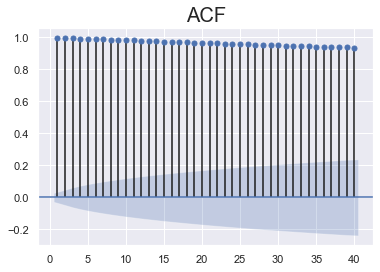

In [68]:
sgt.plot_acf(df_train.market_value,lags=40,zero=False)
plt.title("ACF",size=20)
plt.show()

### PACF of FTSE

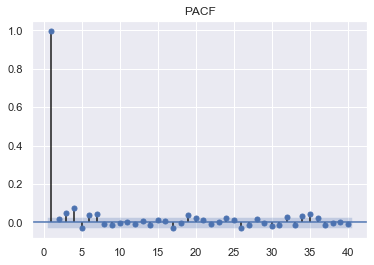

In [69]:
sgt.plot_pacf(df_train.market_value,lags=40,zero=False,method=("ols"))
plt.title("PACF")
plt.show()

### The AR(1) Model

In [70]:
# Import package
from statsmodels.tsa.arima_model import ARMA

In [71]:
model_ar = ARMA(df_train.market_value,order=(1,0))


In [72]:
result_ar = model_ar.fit()

In [73]:
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Sun, 12 Apr 2020   AIC                          55251.195
Time:                        21:47:56   BIC                          55270.759
Sample:                    01-07-1994   HQIC                         55258.051
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5038.0834    487.182     10.341      0.000    4083.225    5992.942
ar.L1.market_value     0.9985      0.001   1298.634      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

In [74]:
model_ar_2 = ARMA(df_train.market_value, order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.871
Method:                       css-mle   S.D. of innovations             59.249
Date:                Sun, 12 Apr 2020   AIC                          55251.742
Time:                        21:47:57   BIC                          55277.827
Sample:                    01-07-1994   HQIC                         55260.883
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    495.684     10.268      0.000    4118.119    6061.164
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4633           +0.0000j           58.4633            0.5000
-----------------------------------------------------------------------------
"""

### Logliklihood ratio test

In [75]:
from scipy.stats.distributions import chi2

**In this test we will compare model with its next period model**

In [76]:
def LLR_test_ar(i,j,data,DF=1): # i and j are the period of time, DF is frequency
    # MOdel of i period
    model_ar_1 = ARMA(data, order=(i,0)) 
    # LLF for model of i period
    L1 = model_ar_1.fit().llf
    
    # Model of j period
    model_ar_2 = ARMA(data, order=(j,0))
    # LLF for model of j period
    L2 = model_ar_2.fit().llf
    
    # Calculate the Logliklihood ratio 
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p
    

In [77]:
LLR_test_ar(i=3,j=4,data=df_train.market_value)

0.0

In [78]:
# Model summary of i period and Loglikelihood test between i and i-1
def ar(i,data):
    model_ar = ARMA(data, order=(i,0))
    results_ar = model_ar.fit()
    print(results_ar.summary())
    print("LLR test between model_ar_"+str(i-1)+" and model_ar_"+str(i)+" : " ,str(LLR_test_ar(i=i-1,j=i,data=data)))

In [79]:
# Lets Print 1 to 9 period model summary and Loglikelihood between every time period with its previous time period model
for i in range(1,10):
    print("\n")
    ar(i=i,data=df_train.market_value)



                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Sun, 12 Apr 2020   AIC                          55251.195
Time:                        21:48:00   BIC                          55270.759
Sample:                    01-07-1994   HQIC                         55258.051
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5038.0834    487.182     10.341      0.000    4083.225    5992.942
ar.L1.market_value     0.9985      0.001   1298.634      0.000       0.997       1.000
                  

LLR test between model_ar_4 and model_ar_5 :  0.035


                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -27596.474
Method:                       css-mle   S.D. of innovations             58.950
Date:                Sun, 12 Apr 2020   AIC                          55208.947
Time:                        21:48:18   BIC                          55261.118
Sample:                    01-07-1994   HQIC                         55227.229
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6415    565.261      9.004      0.000    3981.750    6197.533
ar.L1.market_value     0.9803      0.014     69.604  

LLR test between model_ar_8 and model_ar_9 :  0.288


### The DF test

In [80]:
sts.adfuller(df_train.market_value)

(-1.9041551418836884,
 0.3301089327702823,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

### Using returns

#### Returns -> The % of change between the values for two consecutive periods

**Positive returns increase the price, Negative returns decrease the price**

((Pt -P(t-1))/P(t-1))*100

In [81]:
df_train["returns"] = df_train.market_value.pct_change(1).mul(100)

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
df_train.head()

,spx,dax,ftse,nikkei,market_value,returns
date,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,-0.156704
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,-0.779229
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,-1.222988
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,-0.356166


In [83]:
# First return value is null .Because there no market value previous the first index.
# Lets remove the first index
df_train = df_train.iloc[1:]

In [84]:
df_train.head()

,spx,dax,ftse,nikkei,market_value,returns
date,,,,,,
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,-0.156704
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,-0.779229
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,-1.222988
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,-0.356166
1994-01-14,474.91,2151.05,3400.56,18973.70,3400.56,1.206842


In [85]:
# Lets check DF test on returns
sts.adfuller(df_train.returns)

(-12.770265719497234,
 7.79805833603833e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.7672456975)

### ACF of returns

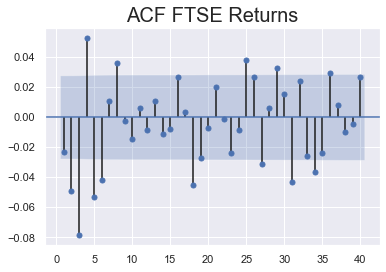

In [86]:
sgt.plot_acf(df_train.returns,lags=40,zero=False)
plt.title("ACF FTSE Returns",size=20)
plt.show()

### PACF of returns

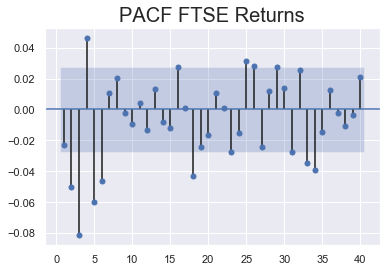

In [87]:
sgt.plot_pacf(df_train.returns,lags=40,zero=False,method=("ols"))
plt.title("PACF FTSE Returns",size=20)
plt.show()

### AR(1) Model for returns 

In [88]:
model_return_ar_1 = ARMA(df_train.returns, order=(1,0))
results_return_ar_1 = model_return_ar_1.fit()
print(results_return_ar_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sun, 12 Apr 2020   AIC                          15865.497
Time:                        21:49:12   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Root

**P Values of both parameter are over 0.05. Thus Neither is significantly different from 0. So this model doesn't hold real predictive power**

**The more easily the yestarday's price is affected by higher lags, the more inaccurate its coefficients becomes**

#### Higher lag AR Model for returns

In [89]:
model_return_ar_1 = ARMA(df_train.returns, order=(1,0))
results_return_ar_1 = model_return_ar_1.fit()
print(results_return_ar_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sun, 12 Apr 2020   AIC                          15865.497
Time:                        21:49:12   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Root

In [90]:
# Lets try for  2 to 10 lag and their LLR_test
for i in range(2,10):
    ar(i=i,data=df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Sun, 12 Apr 2020   AIC                          15854.911
Time:                        21:49:13   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     

LLR test between model_ar_5 and model_ar_6 :  0.001
                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.647
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sun, 12 Apr 2020   AIC                          15791.294
Time:                        21:49:20   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.702      0.089      -0.052 

LLR test between model_ar_8 and model_ar_9 :  0.885


### Normalizing value

**The % of the first value of the set**

In [91]:
benchmark_m = df_train.market_value.iloc[0]
benchmark_m

3440.58

In [92]:
# Create a column norm 
df_train["norm"] = df_train.market_value.div(benchmark_m).mul(100)

In [93]:
# DF test
sts.adfuller(df_train.norm)

(-1.8928710132672324,
 0.3354222074330083,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19553.90073102193)

In [94]:
benchmark_re = df_train.returns.iloc[0]
df_train["norm_res"] = df_train.returns.div(benchmark_re).mul(100)
sts.adfuller(df_train.norm_res)

(-12.7702657194973,
 7.798058336035981e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80114.49116124898)

### AR model on norm_res 

In [95]:
model_return_norm_ar_1 = ARMA(df_train.norm_res, order=(1,0))
results_return_norm_ar_1 = model_return_norm_ar_1.fit()
print(results_return_norm_ar_1.summary())

                              ARMA Model Results                              
Dep. Variable:               norm_res   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood              -40351.743
Method:                       css-mle   S.D. of innovations            749.388
Date:                Sun, 12 Apr 2020   AIC                          80709.487
Time:                        21:49:35   BIC                          80729.050
Sample:                    01-10-1994   HQIC                         80716.342
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731     10.339     -1.158      0.247     -32.237       8.291
ar.L1.norm_res    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    

In [96]:
model_return_norm_ar_6 = ARMA(df_train.norm_res, order=(6,0))
results_return_norm_ar_6 = model_return_norm_ar_6.fit()
print(results_return_norm_ar_6.summary())

                              ARMA Model Results                              
Dep. Variable:               norm_res   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood              -40308.940
Method:                       css-mle   S.D. of innovations            743.021
Date:                Sun, 12 Apr 2020   AIC                          80633.879
Time:                        21:49:35   BIC                          80686.048
Sample:                    01-10-1994   HQIC                         80652.160
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -12.2020      8.536     -1.429      0.153     -28.933       4.529
ar.L1.norm_res    -0.0245      0.014     -1.740      0.082      -0.052       0.003
ar.L2.norm_res    -0.0523      0.014

In [97]:
model_return_norm_ar_7 = ARMA(df_train.norm_res, order=(7,0))
results_return_norm_ar_7 = model_return_norm_ar_7.fit()
print(results_return_norm_ar_7.summary())

                              ARMA Model Results                              
Dep. Variable:               norm_res   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood              -40308.642
Method:                       css-mle   S.D. of innovations            742.977
Date:                Sun, 12 Apr 2020   AIC                          80635.283
Time:                        21:49:37   BIC                          80693.974
Sample:                    01-10-1994   HQIC                         80655.849
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      8.630     -1.387      0.165     -28.887       4.941
ar.L1.norm_res    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.norm_res    -0.0517      0.014

In [98]:
LLR_test_ar(6,7,df_train.norm_res)

0.44

**There no model improvement between returns and its normal value. The model accuracy LLR test are same**

**Using normalize value there no impact on model selection**

### Analysing the residuals

In [99]:
# We observed that model_ar_7 give us better result for market_value

model_ar_7 = ARMA(df_train.market_value, order=(7,0))
results_ar_7 = model_ar_7.fit()

In [100]:
df_train["res_mv"]=results_ar_7.resid

In [101]:
df_train.head()

,spx,dax,ftse,nikkei,market_value,returns,norm,norm_res,res_mv
date,,,,,,,,,
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,-0.156704,100.000000,100.000000,-1649.389037
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,-0.779229,99.220771,497.260711,-29.205607
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,-1.222988,98.007313,780.443046,-44.604127
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,-0.356166,97.658244,227.285567,-16.412201
1994-01-14,474.91,2151.05,3400.56,18973.70,3400.56,1.206842,98.836824,-770.139292,34.055986


In [102]:
print("Mean : ",df_train.res_mv.mean())
print("Variance : ",df_train.res_mv.var())

Mean :  0.35255472613670946
Variance :  4010.4842429316095


**The mean is close to zero, That means on avarage our model performs well but High variance indicated the residuals are not consentrate around mean zero. Thats why it gave us poor result while predicting non stationary data**

In [103]:
# DF test of res_mv
sts.adfuller(df_train.res_mv)

(-75.96947370105393,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 54832.42172144246)

**P = 0 its suggest stationarity**

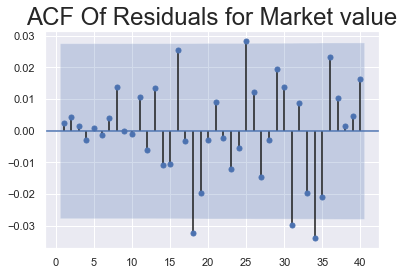

In [104]:
sgt.plot_acf(df_train.res_mv, zero = False, lags = 40)
plt.title("ACF Of Residuals for Market value",size=24)
plt.show()

**Most of the coefficient are in the Blue region, That suggests those are not significantly different from 0. Which means the charecteristics of White noise. However there some of them outside the blu region that indicates there might be better predictor**

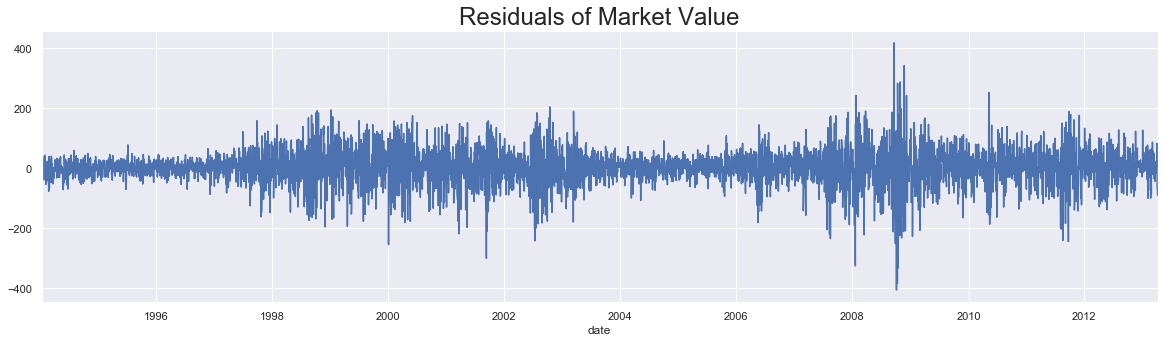

In [105]:
# Plot the res_mv
df_train.res_mv[1:].plot(figsize=(20,5))
plt.title("Residuals of Market Value", size=24)
plt.show()

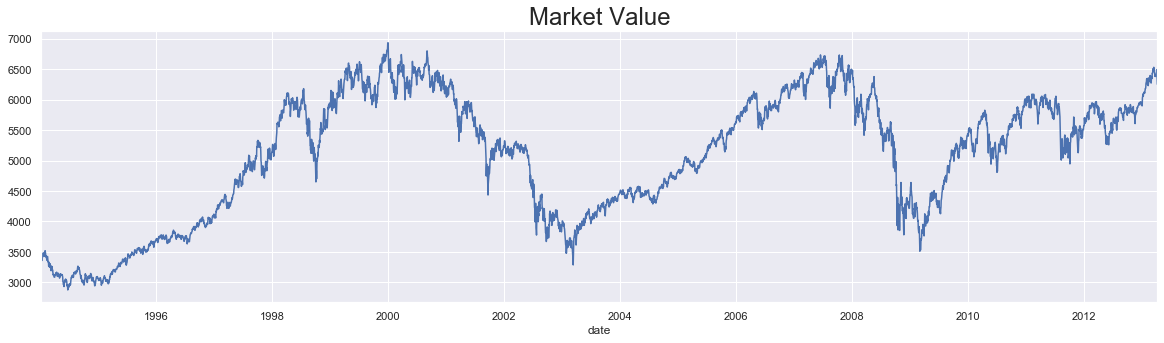

In [106]:
# Plot the marktet value
df_train.market_value.plot(figsize=(20,5))
plt.title("Market Value", size=24)
plt.show()

**Residual market value plot are not like the market value plot.They are far different**

In [107]:
# We obsrved that model_return_ar_6 give us better result for return value
model_return_ar_6 = ARMA(df_train.returns,order=(6,0))
df_train["res_return"]=model_return_ar_6.fit().resid

In [108]:
df_train.head()

,spx,dax,ftse,nikkei,market_value,returns,norm,norm_res,res_mv,res_return
date,,,,,,,,,,
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,-0.156704,100.000000,100.000000,-1649.389037,-0.175623
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,-0.779229,99.220771,497.260711,-29.205607,-0.802198
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,-1.222988,98.007313,780.443046,-44.604127,-1.270028
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,-0.356166,97.658244,227.285567,-16.412201,-0.466065
1994-01-14,474.91,2151.05,3400.56,18973.70,3400.56,1.206842,98.836824,-770.139292,34.055986,1.061277


In [109]:
print("Mean : ",df_train.res_return.mean())
print("Variance : ",df_train.res_return.var())

Mean :  -5.3730302400295284e-05
Variance :  1.3559802110752588


**Mean is close to zero and variance is around 1 indicates us the model we choose is pretty good**

In [110]:
#DF Test for res_return
sts.adfuller(df_train.res_return)

(-70.78379724311958,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15692.570834234799)

**res_mv and res_return DF test results are same. So its indicates data is stationary**

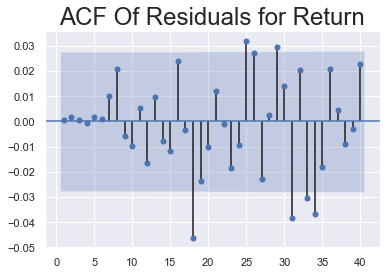

In [111]:
sgt.plot_acf(df_train.res_return, zero = False, lags = 40)
plt.title("ACF Of Residuals for Return",size=24)
plt.show()

**This is pretty similiar with the Residuals for market value plot. Though its a good model but we have reason to believe there better model exist**

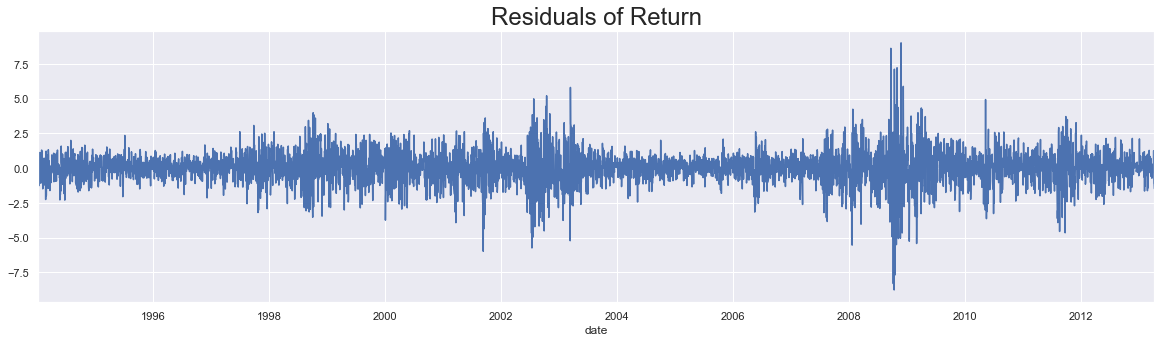

In [112]:
# Plot the res_return
df_train.res_return.plot(figsize=(20,5))
plt.title("Residuals of Return", size=24)
plt.show()

## MA(Moving Avarage model) model

#### ACF plot of returns

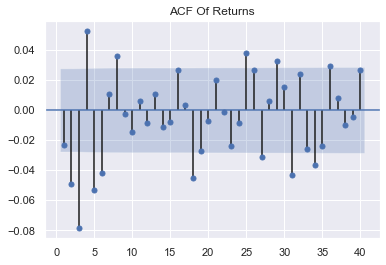

In [113]:
sgt.plot_acf(df_train.returns,zero= False,lags=40)
plt.title("ACF Of Returns")
plt.show()

### MA(1) model

In [114]:
model_res_ma_1 = ARMA(df_train.returns,order=(0,1))
result_ma_1 = model_res_ma_1.fit()
result_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sun, 12 Apr 2020   AIC                          15865.190
Time:                        21:49:47   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.086      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8547           +0.0000j           38.8547            0.0000
-----------------------------------------------------------------------------
"""

### Higher lag MA model

In [115]:
def LLR_test_ma(i,j,data,DF=1): # i and j are the period of time, DF is frequency
    # MOdel of i period
    model_ma_1 = ARMA(data, order=(0,i)) 
    # LLF for model of i period
    L1 = model_ma_1.fit().llf
    
    # Model of j period
    model_ma_2 = ARMA(data, order=(0,j))
    # LLF for model of j period
    L2 = model_ma_2.fit().llf
    
    # Calculate the Logliklihood ratio 
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p
    

In [116]:
# Model summary of i period and Loglikelihood test between i and i-1
def ma(i,data):
    model_ma = ARMA(data, order=(0,i))
    results_ma = model_ma.fit()
    print(results_ma.summary())
    print("LLR test between model_ma_"+str(i-1)+" and model_ma_"+str(i)+" : " ,str(LLR_test_ma(i=i-1,j=i,data=data)))

In [117]:
ma(2,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -7922.864
Method:                       css-mle   S.D. of innovations              1.173
Date:                Sun, 12 Apr 2020   AIC                          15853.728
Time:                        21:49:48   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.239      0.215      -0.011       0.049
ma.L1.returns    -0.0327      0.014     -2.297      0.022      -0.061      -0.005
ma.L2.returns    -0.0502      0.014     

In [118]:
ma(3,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 3)   Log Likelihood               -7904.317
Method:                       css-mle   S.D. of innovations              1.168
Date:                Sun, 12 Apr 2020   AIC                          15818.634
Time:                        21:49:49   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0203      0.014     -1.423      0.155      -0.048       0.008
ma.L2.returns    -0.0556      0.013     

In [119]:
ma(3,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 3)   Log Likelihood               -7904.317
Method:                       css-mle   S.D. of innovations              1.168
Date:                Sun, 12 Apr 2020   AIC                          15818.634
Time:                        21:49:50   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0203      0.014     -1.423      0.155      -0.048       0.008
ma.L2.returns    -0.0556      0.013     

In [120]:
ma(4,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 4)   Log Likelihood               -7898.773
Method:                       css-mle   S.D. of innovations              1.167
Date:                Sun, 12 Apr 2020   AIC                          15809.547
Time:                        21:49:53   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.305      0.192      -0.009       0.047
ma.L1.returns    -0.0203      0.014     -1.443      0.149      -0.048       0.007
ma.L2.returns    -0.0551      0.014     

In [121]:
ma(5,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 5)   Log Likelihood               -7892.823
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sun, 12 Apr 2020   AIC                          15799.645
Time:                        21:49:57   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0262      0.014     -1.851      0.064      -0.054       0.002
ma.L2.returns    -0.0497      0.014     

In [122]:
ma(6,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -7889.221
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sun, 12 Apr 2020   AIC                          15794.442
Time:                        21:50:04   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.430      0.153      -0.007       0.045
ma.L1.returns    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.returns    -0.0486      0.014     

In [123]:
ma(7,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 7)   Log Likelihood               -7889.046
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sun, 12 Apr 2020   AIC                          15796.091
Time:                        21:50:15   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.418      0.156      -0.007       0.045
ma.L1.returns    -0.0247      0.014     -1.739      0.082      -0.052       0.003
ma.L2.returns    -0.0488      0.014     

**ma_7 model P value = 0.554 which is not significant and LLR test result is also failed**

In [124]:
# Lets try with lag 8
ma(8,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood               -7885.603
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sun, 12 Apr 2020   AIC                          15791.205
Time:                        21:50:32   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.364      0.173      -0.008       0.046
ma.L1.returns    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.returns    -0.0495      0.014     

**We saw ma_8 model p value is significant and it passes LLR test**

### Compare ma_6 and ma_8 model

In [125]:
LLR_test_ma(6,8,df_train.returns,DF=2)

0.027

**ma_8 is better model then ma_6. So try again**

In [126]:
for i in range (9,12):
    ma(i,df_train.returns)
    print("\n")
    

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 9)   Log Likelihood               -7885.457
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sun, 12 Apr 2020   AIC                          15792.914
Time:                        21:51:03   BIC                          15864.648
Sample:                    01-10-1994   HQIC                         15818.051
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ma.L2.returns    -0.0494      0.014     

LLR test between model_ma_10 and model_ma_11 :  0.444




**None of these models p values are significant so, we can choose model_8**

----

**when fitting the MA(Q) model, if the Qth lag is not significant in the ACF plot, The Qth coefficient of the summary table won't be significant as well**

## Residuals for Returns

### For MA(8)

In [127]:
model_res_ma_8 = ARMA(df_train.returns,order=(0,8))
result_ma_8 = model_res_ma_8.fit()

In [128]:
df_train['res_ret_ma_8'] = result_ma_8.resid

In [129]:
df_train.head()

,spx,dax,ftse,nikkei,market_value,returns,norm,norm_res,res_mv,res_return,res_ret_ma_8
date,,,,,,,,,,,
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,-0.156704,100.000000,100.000000,-1649.389037,-0.175623,-0.175611
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,-0.779229,99.220771,497.260711,-29.205607,-0.802198,-0.802111
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,-1.222988,98.007313,780.443046,-44.604127,-1.270028,-1.269464
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,-0.356166,97.658244,227.285567,-16.412201,-0.466065,-0.464780
1994-01-14,474.91,2151.05,3400.56,18973.70,3400.56,1.206842,98.836824,-770.139292,34.055986,1.061277,1.061816


In [130]:
print("Mean : ",round(df_train.res_ret_ma_8.mean(),3))
print("Variance : ",round(df_train.res_ret_ma_8.var(),3))
print("Standard diviation : ",round(df_train.res_ret_ma_8.std(),3))

Mean :  -0.0
Variance :  1.355
Standard diviation :  1.164


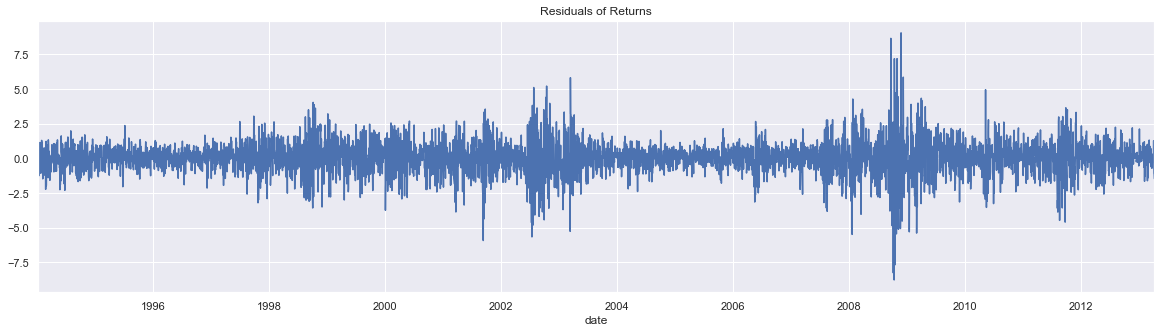

In [131]:
df_train.res_ret_ma_8.plot(figsize=(20,5))
plt.title("Residuals of Returns")
plt.show()

In [132]:
sts.adfuller(df_train.res_ret_ma_8)

(-70.83821801486906,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15689.88192007706)

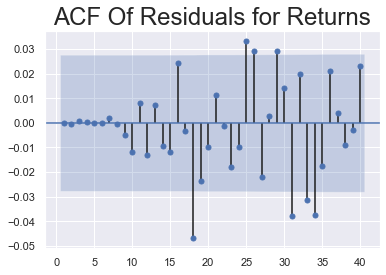

In [133]:
sgt.plot_acf(df_train.res_ret_ma_8, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

### For MA(6)

In [134]:
model_res_ma_6 = ARMA(df_train.returns,order=(0,6))
result_ma_6 = model_res_ma_6.fit()

In [135]:
df_train['res_ret_ma_6'] = result_ma_6.resid
df_train.head()

,spx,dax,ftse,nikkei,market_value,returns,norm,norm_res,res_mv,res_return,res_ret_ma_8,res_ret_ma_6
date,,,,,,,,,,,,
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,-0.156704,100.000000,100.000000,-1649.389037,-0.175623,-0.175611,-0.175622
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,-0.779229,99.220771,497.260711,-29.205607,-0.802198,-0.802111,-0.802083
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,-1.222988,98.007313,780.443046,-44.604127,-1.270028,-1.269464,-1.268789
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,-0.356166,97.658244,227.285567,-16.412201,-0.466065,-0.464780,-0.461319
1994-01-14,474.91,2151.05,3400.56,18973.70,3400.56,1.206842,98.836824,-770.139292,34.055986,1.061277,1.061816,1.066737


In [136]:
print("Mean : ",round(df_train.res_ret_ma_6.mean(),3))
print("Variance : ",round(df_train.res_ret_ma_6.var(),3))
print("Standard diviation : ",round(df_train.res_ret_ma_6.std(),3))

Mean :  -0.0
Variance :  1.357
Standard diviation :  1.165


**Mean,Variance and Standard diviation of two models are quite same**

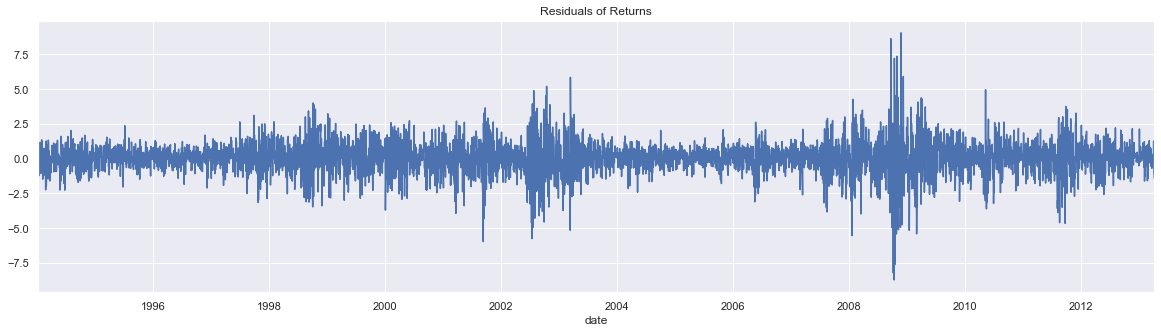

In [137]:
df_train.res_ret_ma_6.plot(figsize=(20,5))
plt.title("Residuals of Returns")
plt.show()

**The graph of two models has no difference**

In [138]:
sts.adfuller(df_train.res_ret_ma_6)

(-70.84236824542776,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15697.059600639956)

**Df test results are also same**

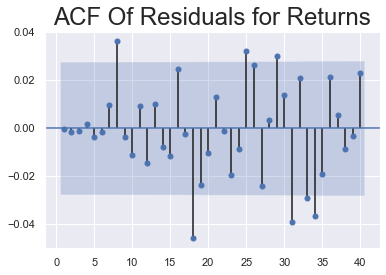

In [139]:
sgt.plot_acf(df_train.res_ret_ma_6, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

**We can see the first significant value of MA(6) is 8 where for MA(8) was 18**

## MA model on Normalize returns

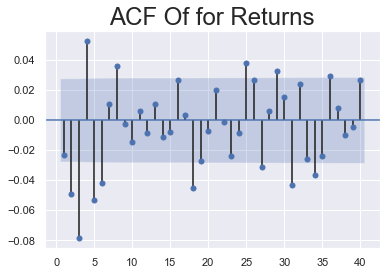

In [140]:
# ACF of returns
sgt.plot_acf(df_train.returns, zero = False, lags = 40)
plt.title("ACF Of for Returns",size=24)
plt.show()

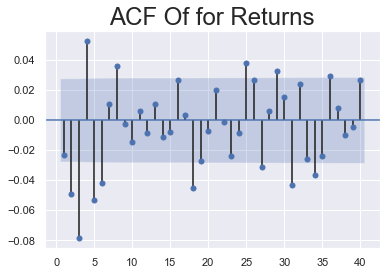

In [141]:
# ACF of normalize return
sgt.plot_acf(df_train.norm_res, zero = False, lags = 40)
plt.title("ACF Of for Returns",size=24)
plt.show()

**The graph of returns after and before normalizing are pretty similar. and We can see 6 and 8 lags gives better result**

In [142]:
# Lets fit  model and get summary
model_norm_ret_ma_8 = ARMA(df_train.norm_res, order=(0,8))
results_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
results_norm_ret_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_res   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood              -40307.597
Method:                       css-mle   S.D. of innovations            742.822
Date:                Sun, 12 Apr 2020   AIC                          80635.194
Time:                        21:52:30   BIC                          80700.406
Sample:                    01-10-1994   HQIC                         80658.045
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      8.846     -1.354      0.176     -29.310       5.364
ma.L1.norm_res    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.norm_res    -0.0495      0.014     -3.514      0.000      -0.077      -0.022
ma.L3.norm_res    -0.0847      0.014     -5.993      0.000      -0.112      -0.057
ma.L4.norm_res     0.0488      0.014      3.440      0.001       0.021       0.077
ma.L5.norm_res    -0.0518      0.014     -3.634      0.000      -0.080      -0.024
ma.L6.norm_res    -0.0402      0.014     -2.787      0.005      -0.068      -0.012
ma.L7.norm_res     0.0084      0.014      0.587      0.557      -0.020       0.036
ma.L8.norm_res     0.0366      0.014      2.626      0.009       0.009       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.4716           -0.4282j            1.5326           -0.0451
MA.2            1.4716           +0.4282j            1.5326            0.0451
MA.3            0.5944           -1.3169j            1.4448           -0.1825
MA.4            0.5944           +1.3169j            1.4448            0.1825
MA.5           -0.7318           -1.2736j            1.4689           -0.3330
MA.6           -0.7318           +1.2736j            1.4689            0.3330
MA.7           -1.4485           -0.6983j            1.6081           -0.4285
MA.8           -1.4485           +0.6983j            1.6081            0.4285
-----------------------------------------------------------------------------
"""

In [143]:
df_train['res_norm_ret_ma_8'] = results_norm_ret_ma_8.resid

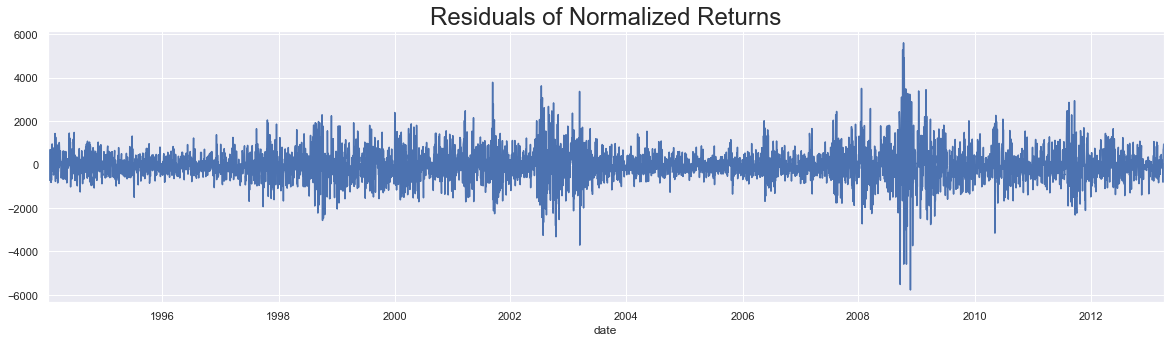

In [144]:
df_train.res_norm_ret_ma_8.plot(figsize=(20,5))
plt.title("Residuals of Normalized Returns",size=24)
plt.show()

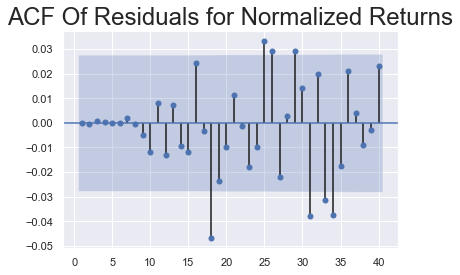

In [145]:
sgt.plot_acf(df_train.res_norm_ret_ma_8, zero = False, lags = 40)
plt.title("ACF Of Residuals for Normalized Returns",size=24)
plt.show()

**MA(8) for both Returns and Normalized returns gives us same model summary,graph and acf.**

In [146]:
# Lets fit  model and get summary
model_norm_ret_ma_6 = ARMA(df_train.norm_res, order=(0,6))
results_norm_ret_ma_6 = model_norm_ret_ma_6.fit()
results_norm_ret_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_res   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood              -40311.216
Method:                       css-mle   S.D. of innovations            743.358
Date:                Sun, 12 Apr 2020   AIC                          80638.431
Time:                        21:52:38   BIC                          80690.601
Sample:                    01-10-1994   HQIC                         80656.712
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      8.442     -1.418      0.156     -28.518       4.572
ma.L1.norm_res    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.norm_res    -0.0486      0.014     -3.436      0.001      -0.076      -0.021
ma.L3.norm_res    -0.0827      0.014     -5.846      0.000      -0.110      -0.055
ma.L4.norm_res     0.0466      0.014      3.434      0.001       0.020       0.073
ma.L5.norm_res    -0.0484      0.014     -3.371      0.001      -0.077      -0.020
ma.L6.norm_res    -0.0387      0.014     -2.682      0.007      -0.067      -0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.5010           -0.0000j            1.5010           -0.0000
MA.2            0.8248           -1.4775j            1.6921           -0.1690
MA.3            0.8248           +1.4775j            1.6921            0.1690
MA.4           -1.0066           -1.2260j            1.5863           -0.3594
MA.5           -1.0066           +1.2260j            1.5863            0.3594
MA.6           -2.3891           -0.0000j            2.3891           -0.5000
-----------------------------------------------------------------------------
"""

In [147]:
df_train['res_norm_ret_ma_6'] = results_norm_ret_ma_6.resid

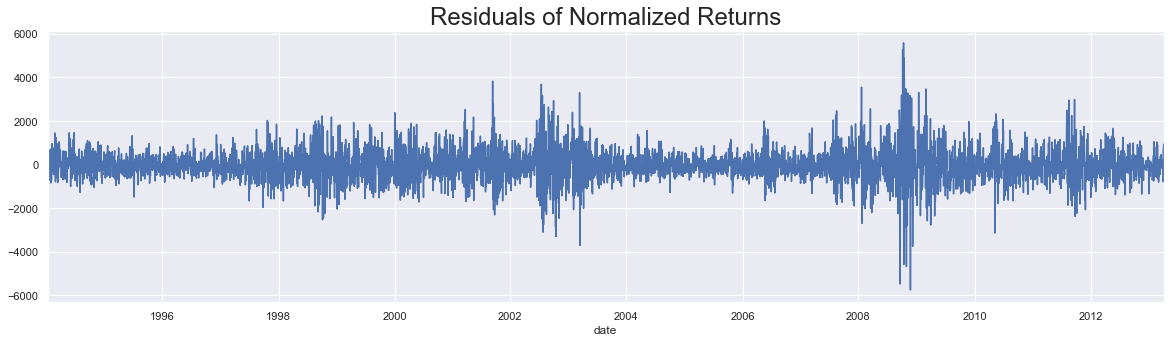

In [148]:
df_train.res_norm_ret_ma_6.plot(figsize=(20,5))
plt.title("Residuals of Normalized Returns",size=24)
plt.show()

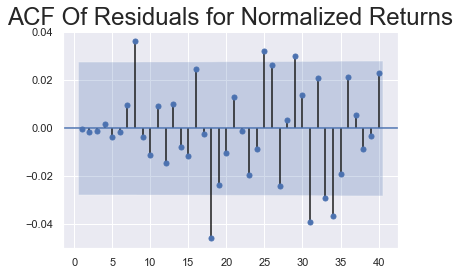

In [149]:
sgt.plot_acf(df_train.res_norm_ret_ma_6, zero = False, lags = 40)
plt.title("ACF Of Residuals for Normalized Returns",size=24)
plt.show()

**MA(6) for both Returns and Normalized returns gives us also same model summary,graph and acf.**

#### So We can conclude that Normalizing data has no effect on model

### MA Model for price

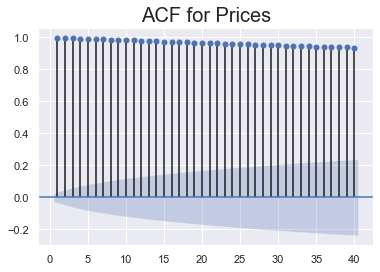

In [150]:
# Plot acf
sgt.plot_acf(df_train.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size=20)
plt.show()

In [151]:
model_ma_mv_1 = ARMA(df.market_value, order=(0,1))
results_ma_mv_1 = model_ma_mv_1.fit()
results_ma_mv_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(0, 1)   Log Likelihood              -43547.796
Method:                       css-mle   S.D. of innovations            249.257
Date:                Sun, 12 Apr 2020   AIC                          87101.592
Time:                        21:52:43   BIC                          87121.826
Sample:                    01-07-1994   HQIC                         87108.603
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1288.7140      6.226    206.996      0.000    1276.512    1300.916
ma.L1.market_value     0.9791      0.002    532.452      0.000       0.975       0.983
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0214           +0.0000j            1.0214            0.5000
-----------------------------------------------------------------------------
"""

___

# ARMA ( Auto Regressive Moving Avarage )

In [152]:
def LLR_test_arma(ar1,ma1,ar2,ma2,data,DF=1): # i and j are the period of time, DF is frequency
    # MOdel of ar1 and ma2 
    model_ar_1_ma_1 = ARMA(data, order=(ar1,ma1)) 
    # LLF for model 
    L1 = model_ar_1_ma_1.fit().llf
    
    # Model of ar2,ma2
    model_ar_2_ma_2 = ARMA(data, order=(ar2,ma2))
    # LLF for model 
    L2 =  model_ar_2_ma_2.fit().llf
    
    # Calculate the Logliklihood ratio 
    
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [153]:
def arma(i,j,data):
    model_ma = ARMA(data, order=(i,j))
    results_ma = model_ma.fit()
    print(results_ma.summary())
   

### ARMA (1,1)

In [154]:
arma(1,1,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood               -7916.500
Method:                       css-mle   S.D. of innovations              1.171
Date:                Sun, 12 Apr 2020   AIC                          15841.000
Time:                        21:52:46   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.446      0.148      -0.007       0.045
ar.L1.returns     0.7649      0.067     11.349      0.000       0.633       0.897
ma.L1.returns    -0.8141      0.061    -

### Higher lag model of ARMA

In [155]:
arma(3,3,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 3)   Log Likelihood               -7893.515
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sun, 12 Apr 2020   AIC                          15803.030
Time:                        21:52:51   BIC                          15855.199
Sample:                    01-10-1994   HQIC                         15821.310
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.395      0.163      -0.008       0.045
ar.L1.returns    -0.1898      0.104     -1.827      0.068      -0.393       0.014
ar.L2.returns    -0.2942      0.087     

**Examining the P value we see that the the 1st lag moving avarage coefficient is not signifacntly diffrent from  0. This suggest this might be irrelavent and lower lag model can be better use.**

In [156]:
# Lets LLR test between two model

LLR_test_arma(ar1=1,ma1=1,ar2=3,ma2=3,data=df_train.returns,DF=4)

0.0

**LLR test suugest that arma(3,3) is better than arma(1,1).So, the best fit might be somewhere between (1,1) to (3,3)**

### Lets Reduce the lag Of  ARMA model and Extamine those

In [157]:
# Lets try with ar + ma = 5
arma(3,2,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 2)   Log Likelihood               -7895.747
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sun, 12 Apr 2020   AIC                          15805.495
Time:                        21:53:04   BIC                          15851.143
Sample:                    01-10-1994   HQIC                         15821.491
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.251      0.211      -0.011       0.048
ar.L1.returns    -0.6785      0.087     -7.799      0.000      -0.849      -0.508
ar.L2.returns    -0.5088      0.139     

In [158]:
arma(2,3,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 3)   Log Likelihood               -7895.587
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sun, 12 Apr 2020   AIC                          15805.174
Time:                        21:53:07   BIC                          15850.823
Sample:                    01-10-1994   HQIC                         15821.170
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.276      0.202      -0.010       0.048
ar.L1.returns    -0.5605      0.090     -6.245      0.000      -0.736      -0.385
ar.L2.returns    -0.4187      0.193     

In [159]:
LLR_test_arma(2,3,3,3,df_train.returns)

0.042

**We should opt ARMA(3,3) model ARMA(2,3) model if we have to choose from these two**

In [160]:
arma(3,1,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 1)   Log Likelihood               -7899.072
Method:                       css-mle   S.D. of innovations              1.167
Date:                Sun, 12 Apr 2020   AIC                          15810.144
Time:                        21:53:19   BIC                          15849.271
Sample:                    01-10-1994   HQIC                         15823.855
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.298      0.194      -0.010       0.047
ar.L1.returns    -0.5077      0.088     -5.769      0.000      -0.680      -0.335
ar.L2.returns    -0.0638      0.016     

**This model summary is similar to ARMA(3,2)**

In [161]:
# LLR test between two similar model
LLR_test_arma(3,1,3,2,df_train.returns)

0.01

**The more complicated model(ARMA(3,2)) is the better aproximater**

In [162]:
arma(2,2,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 2)   Log Likelihood               -7913.223
Method:                       css-mle   S.D. of innovations              1.170
Date:                Sun, 12 Apr 2020   AIC                          15838.446
Time:                        21:53:25   BIC                          15877.573
Sample:                    01-10-1994   HQIC                         15852.156
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.394      0.163      -0.008       0.045
ar.L1.returns     0.7820      0.238      3.284      0.001       0.315       1.249
ar.L2.returns    -0.1563      0.177     

**We observed two of its coefficient are not significant.Interestingly both coeeficients are 2nd lag**

**We also obseved in ARMA(2,3) same pattern which suggests us Simplier model like ARMA(1,2)(2,1) would outperform it(ARMA(2,2). Thats symbol us to avoid ARMA(2,2) at all cost**

In [163]:
arma(1,3,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 3)   Log Likelihood               -7896.838
Method:                       css-mle   S.D. of innovations              1.167
Date:                Sun, 12 Apr 2020   AIC                          15805.676
Time:                        21:53:28   BIC                          15844.803
Sample:                    01-10-1994   HQIC                         15819.386
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.332      0.183      -0.009       0.047
ar.L1.returns    -0.4699      0.096     -4.901      0.000      -0.658      -0.282
ma.L1.returns     0.4474      0.095     

**Its all 4 coefficients are 0 which is significant. Its has a chance to be a good predictor**

**Usually we will go on to use LLR test to compare it with ARMA(3,2). But the two model are not nested. Such an issue could never occur strictly AR or MA model. Because any lower model are nested with complecated one**

## When become nested ??

**Lets we have two model ARMA(P1,Q1)  and  ARMA(P2,Q2)... The second model is nested if ...**

1. P1 + Q1 > P2 + Q2 

2. P1 >= P2 

3. Q1 >= Q2

**When these 3 all condition is satisfied**

Here ARMA(1,3) has the more ma than ARMA(3,2) this means the 3rd conditions is not satisfied. So LLR test become void 

**In this situation we have to manually compare these two models. For this we compare Loglikelyhood and AICs of both models**

In [164]:
# Train models and get result
model_ar_1_ma_3 = ARMA(df_train.returns, order=(1,3))
result_ar_1_ma_3 = model_ar_1_ma_3.fit()

model_ar_3_ma_2 = ARMA(df_train.returns, order=(3,2))
result_ar_3_ma_2 = model_ar_3_ma_2.fit()


In [165]:
# Lets compare LL and aic
print("\n ARMA(3,2): \tLL = ", result_ar_3_ma_2.llf, "\tAIC = ", result_ar_3_ma_2.aic)
print("\n ARMA(1,3): \tLL = ", result_ar_1_ma_3.llf, "\tAIC = ", result_ar_1_ma_3.aic)


 ARMA(3,2): 	LL =  -7895.747458514756 	AIC =  15805.494917029511

 ARMA(1,3): 	LL =  -7896.837893753091 	AIC =  15805.675787506181


**Higher LL and Lower AICS should be prefred**

**So, ARMA(3,2) is better**

**All of the model ARMA(3,2) is better Because....**

1. It's coefficients are all significant

2. Outpredicts or less complex alternatives

**(Begining with an over parameterized model and then finding a better and simpler option)**

## Residuals for returns

In [166]:
df_train["res_ret_ar_3_ma_2"] =result_ar_3_ma_2.resid

In [167]:
df_train.head()

,spx,dax,ftse,nikkei,market_value,returns,norm,norm_res,res_mv,res_return,res_ret_ma_8,res_ret_ma_6,res_norm_ret_ma_8,res_norm_ret_ma_6,res_ret_ar_3_ma_2
date,,,,,,,,,,,,,,,
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,-0.156704,100.000000,100.000000,-1649.389037,-0.175623,-0.175611,-0.175622,111.973065,111.973065,-0.175537
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,-0.779229,99.220771,497.260711,-29.205607,-0.802198,-0.802111,-0.802083,511.768641,511.743823,-0.802111
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,-1.222988,98.007313,780.443046,-44.604127,-1.270028,-1.269464,-1.268789,810.002735,809.564871,-1.269911
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,-0.356166,97.658244,227.285567,-16.412201,-0.466065,-0.464780,-0.461319,296.489709,294.273673,-0.463250
1994-01-14,474.91,2151.05,3400.56,18973.70,3400.56,1.206842,98.836824,-770.139292,34.055986,1.061277,1.061816,1.066737,-677.694257,-680.842155,1.076360


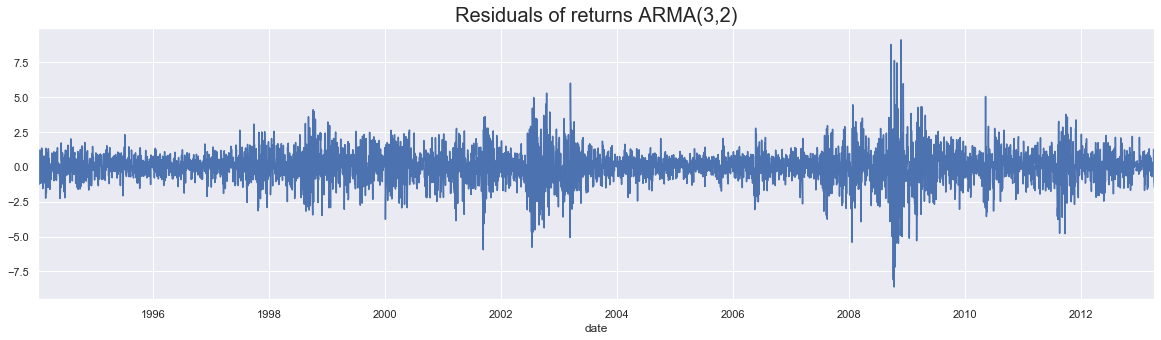

In [168]:
# Plot residuals
df_train.res_ret_ar_3_ma_2.plot(figsize=(20,5))
plt.title("Residuals of returns ARMA(3,2)",size=20)
plt.show()


**The plot look similar to AR and MA model.This suggest the volatility in returns might not be fully comprehendable if we use only ARMA models**

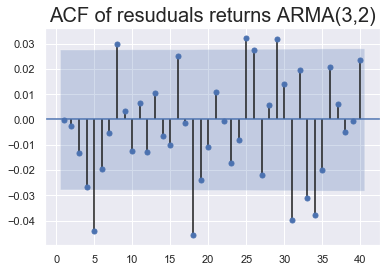

In [169]:
# To make sure the plot is random we also plot acf
sgt.plot_acf(df_train.res_ret_ar_3_ma_2,zero=False,lags=40)
plt.title("ACF of resuduals returns ARMA(3,2)",size=20)
plt.show()

### Significant lags = Dot's outside the blue area

**We got more significant lags then ar and ma models. The 5th lag incoperate with ar only and ma only model. So it make sense the error term of ar and ma only model is zero.**

**So accounting either returns or residuals 5 periods ago , could improve our prediction. We should start with ARMA(5,5) and go through the model**


### ARMA(5,5)

In [170]:
arma(5,5,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 5)   Log Likelihood               -7882.160
Method:                       css-mle   S.D. of innovations              1.163
Date:                Sun, 12 Apr 2020   AIC                          15788.321
Time:                        21:53:58   BIC                          15866.575
Sample:                    01-10-1994   HQIC                         15815.742
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.402      0.161      -0.008       0.045
ar.L1.returns    -0.0684      0.140     -0.490      0.624      -0.342       0.205
ar.L2.returns    -0.6722      0.146     

**Here 3 coeffients are significant. Taking both returns and residuals 5 periods ago is redundant/unnecessary**

**We should try ARMA(5,1),ARMA(5,2)........ ARMA(2,5),ARMA(1,5) all these 8 models. And see which one has significant coefficient**

In [171]:
for i in range(1,5):
    arma(5,i,df_train.returns)
    print("\n")

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 1)   Log Likelihood               -7889.311
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sun, 12 Apr 2020   AIC                          15794.623
Time:                        21:54:07   BIC                          15846.792
Sample:                    01-10-1994   HQIC                         15812.903
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.407      0.159      -0.007       0.045
ar.L1.returns     0.3440      0.131      2.624      0.009       0.087       0.601
ar.L2.returns    -0.0458      0.015     

**Among four models we observed that ARMA(5,1)  coefficients are all singnificant**

In [172]:
for i in range(1,5):
    arma(i,5,df_train.returns)
    print("\n")

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 5)   Log Likelihood               -7890.973
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sun, 12 Apr 2020   AIC                          15797.947
Time:                        21:54:37   BIC                          15850.116
Sample:                    01-10-1994   HQIC                         15816.228
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.419      0.156      -0.007       0.045
ar.L1.returns     0.3285      0.152      2.159      0.031       0.030       0.627
ma.L1.returns    -0.3534      0.152     

**Among four models we observed that ARMA(1,5)  coefficients are all singnificant**

### Lets finds which one is better model

**ARMA(1,5) and ARMA(5,1) both has same number of degrees of freedom. So we can't do LLR test**

In [173]:
# Train models and get result
model_ar_5_ma_1 = ARMA(df_train.returns, order=(5,1))
result_ar_5_ma_1 = model_ar_5_ma_1.fit()

model_ar_1_ma_5 = ARMA(df_train.returns, order=(1,5))
result_ar_1_ma_5 = model_ar_1_ma_5.fit()


In [174]:
# Lets compare LL and aic
print("\n ARMA(1,5): \tLL = ", result_ar_1_ma_5.llf, "\tAIC = ", result_ar_1_ma_5.aic)
print("\n ARMA(5,1): \tLL = ", result_ar_5_ma_1.llf, "\tAIC = ", result_ar_5_ma_1.aic)


 ARMA(1,5): 	LL =  -7890.973460209455 	AIC =  15797.94692041891

 ARMA(5,1): 	LL =  -7889.311282946238 	AIC =  15794.622565892476


**ARMA(5,1) ha higher liklihood and lower aic. So ARMA(5,1) is better one between two**

#### Residuals for ARMA(5,1)

In [175]:
df_train["res_ret_ar_5_ma_1"] =result_ar_5_ma_1.resid

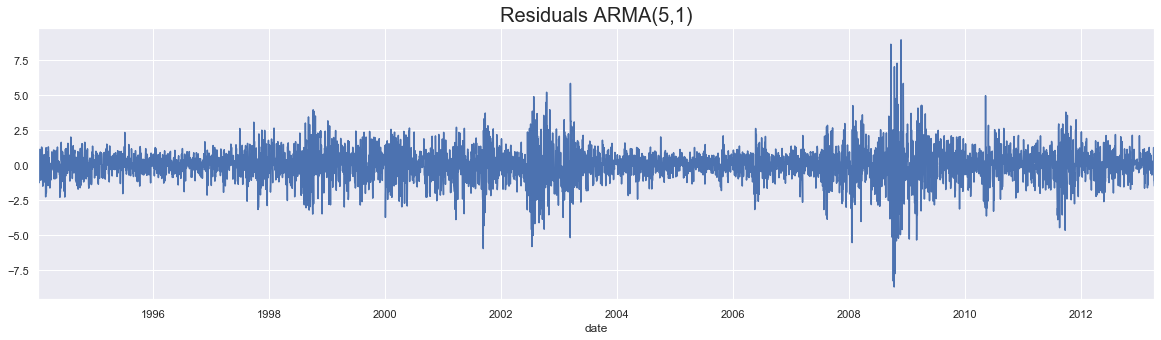

In [176]:
# Plot this
df_train.res_ret_ar_5_ma_1.plot(figsize=(20,5))
plt.title("Residuals ARMA(5,1)",size=20)
plt.show()

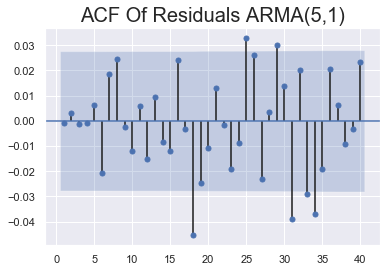

In [177]:
# ACF plot
sgt.plot_acf(df_train.res_ret_ar_5_ma_1,zero=False,lags=40)
plt.title("ACF Of Residuals ARMA(5,1)",size=20)
plt.show()

**5th lag is not significant anymore.Even no other lag before 18th. If we want our model resemble the data more closely then
we could include even more lag we want.But This will failure the model when it will face unfamiliar data. Including so many lags help us know with confidence how this specific data sets moves, rather than how the actual market returns fluctuate. The effects of returns and error tend to diminish over time. The further back in time we go the less relevent the values are predicting in the future. Since more than 10 lags are not significant we can say the residuals are pretty much random which is what we trying to achive**

**We saw a pattern in the residuals time series, Which means there is a factor we hadn't accounted for in our regression.**

### ARMA model for nonstationary data

In [178]:
# Lets try with ARMA(1,1)
arma(1,1,df_train.market_value)

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood              -27616.783
Method:                       css-mle   S.D. of innovations             59.254
Date:                Sun, 12 Apr 2020   AIC                          55241.566
Time:                        21:55:41   BIC                          55267.651
Sample:                    01-10-1994   HQIC                         55250.706
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5010.6737    499.552     10.030      0.000    4031.569    5989.779
ar.L1.market_value     0.9985      0.001   1322.987      0.000       0.997       1.000
ma.L1.market_value  

**Constant and ar coefficient are significant but ma coefficient is not significant. Its indictes simple model is not best fit**

In [179]:
model_mv_ar_1_ma_1 = ARMA(df_train.market_value,order=(1,1))
result_mv_ar_1_ma_1 = model_mv_ar_1_ma_1.fit()

In [180]:
df_train["res_mv_ar_1_ma_1"] = result_mv_ar_1_ma_1.resid

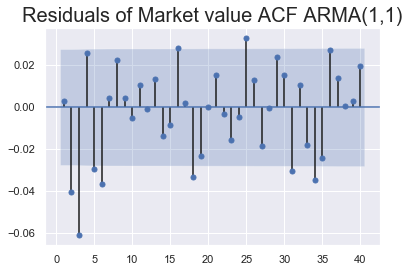

In [181]:
# ACF 
sgt.plot_acf(df_train.res_mv_ar_1_ma_1,zero=False,lags=40)
plt.title("Residuals of Market value ACF ARMA(1,1)",size=20)
plt.show()

**We see 2 to 6th lags are significant.. Lets try ARMA(6,1)...... to....ARMA(1,6)**

In [182]:
model_mv_ar_6_ma_6 = ARMA(df_train.market_value, order=(6,6))
results_mv_ar_6_ma_6 = model_mv_ar_6_ma_6.fit(start_ar_lags = 11) # we have to add start lag for non stationary
results_mv_ar_6_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(6, 6)   Log Likelihood              -27582.935
Method:                       css-mle   S.D. of innovations             58.855
Date:                Sun, 12 Apr 2020   AIC                          55193.869
Time:                        21:55:58   BIC                          55285.166
Sample:                    01-10-1994   HQIC                         55225.861
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.9738    568.358      8.956      0.000    3976.012    6203.936
ar.L1.market_value     1.9165      0.034     55.833      0.000       1.849       1.984
ar.L2.market_value    -1.7242      0.043    -40.501      0.000      -1.808      -1.641
ar.L3.market_value     1.2606      0.036     34.654      0.000       1.189       1.332
ar.L4.market_value    -0.2316      0.131     -1.763      0.078      -0.489       0.026
ar.L5.market_value    -0.4025      0.140     -2.866      0.004      -0.678      -0.127
ar.L6.market_value     0.1807      0.051      3.571      0.000       0.082       0.280
ma.L1.market_value    -0.9376      0.037    -25.287      0.000      -1.010      -0.865
ma.L2.market_value     0.7789      0.033     23.485      0.000       0.714       0.844
ma.L3.market_value    -0.5027      0.032    -15.621      0.000      -0.566      -0.440
ma.L4.market_value    -0.1565      0.131     -1.193      0.233      -0.414       0.101
ma.L5.market_value     0.0919      0.058      1.583      0.114      -0.022       0.206
ma.L6.market_value     0.0663      0.022      3.045      0.002       0.024       0.109
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0859           -1.0499j            1.0534           -0.2370
AR.2            0.0859           +1.0499j            1.0534            0.2370
AR.3           -2.0289           -0.0000j            2.0289           -0.5000
AR.4            1.0011           -0.0000j            1.0011           -0.0000
AR.5            1.5420           -0.2799j            1.5672           -0.0286
AR.6            1.5420           +0.2799j            1.5672            0.0286
MA.1            0.1030           -1.0608j            1.0657           -0.2346
MA.2            0.1030           +1.0608j            1.0657            0.2346
MA.3            1.3716           -0.2858j            1.4010           -0.0327
MA.4            1.3716           +0.2858j            1.4010            0.0327
MA.5           -2.1674           -1.4364j            2.6002           -0.4069
MA.6           -2.1674           +1.4364j            2.6002            0.4069
-----------------------------------------------------------------------------
"""

In [183]:
# Lets rewrite arma model include start lags

def arma_updated(ar,ma,st_lag,data):
    model_ma = ARMA(data, order=(ar,ma))
    results_ma = model_ma.fit(start_ar_lags = st_lag)
    print(results_ma.summary())
    

In [184]:
for i in range(1,6):
    arma_updated(6,i,7,df_train.market_value)
    print("\n")

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(6, 1)   Log Likelihood              -27589.192
Method:                       css-mle   S.D. of innovations             58.929
Date:                Sun, 12 Apr 2020   AIC                          55196.385
Time:                        21:56:15   BIC                          55255.076
Sample:                    01-10-1994   HQIC                         55216.951
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.9688    587.405      8.665      0.000    3938.677    6241.261
ar.L1.market_value     1.3920      0.058     23.979      0.000       1.278       1.506
ar.L2.market_value  

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(6, 4)   Log Likelihood              -27583.582
Method:                       css-mle   S.D. of innovations             58.863
Date:                Sun, 12 Apr 2020   AIC                          55191.164
Time:                        21:57:01   BIC                          55269.418
Sample:                    01-10-1994   HQIC                         55218.585
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.9566    578.191      8.803      0.000    3956.723    6223.190
ar.L1.market_value     1.1820      0.143      8.260      0.000       0.902       1.463
ar.L2.market_value  

**Among these model  ARMA(6,1) is better**

In [185]:
for i in range(1,6):
    arma_updated(i,6,7,df_train.market_value)
    print("\n")

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(1, 6)   Log Likelihood              -27588.139
Method:                       css-mle   S.D. of innovations             58.916
Date:                Sun, 12 Apr 2020   AIC                          55194.279
Time:                        21:57:46   BIC                          55252.969
Sample:                    01-10-1994   HQIC                         55214.845
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.9688    593.433      8.577      0.000    3926.862    6253.076
ar.L1.market_value     0.9990      0.001   1625.919      0.000       0.998       1.000
ma.L1.market_value  

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(4, 6)   Log Likelihood              -27583.583
Method:                       css-mle   S.D. of innovations             58.863
Date:                Sun, 12 Apr 2020   AIC                          55191.167
Time:                        21:58:26   BIC                          55269.421
Sample:                    01-10-1994   HQIC                         55218.588
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.9818    578.773      8.794      0.000    3955.608    6224.356
ar.L1.market_value     1.7974      0.080     22.334      0.000       1.640       1.955
ar.L2.market_value  

**Among these model, ARMA(5,6) is better.**

In [186]:
# Train those model
model_mv_ar_6_ma_1 = ARMA(df_train.market_value, order=(6,1))
results_mv_ar_6_ma_1 = model_mv_ar_6_ma_1.fit(start_ar_lags = 7) # we have to add start lag for non stationary

model_mv_ar_5_ma_6 = ARMA(df_train.market_value, order=(5,6))
results_mv_ar_5_ma_6 = model_mv_ar_5_ma_6.fit(start_ar_lags = 7) # we have to add start lag for non stationary


In [187]:
# LL and Aic test
print("ARMA(6,1):  \t LL = ", results_mv_ar_6_ma_1.llf, "\t AIC = ", results_mv_ar_6_ma_1.aic)
print("ARMA(5,6):  \t LL = ", results_mv_ar_5_ma_6.llf, "\t AIC = ", results_mv_ar_5_ma_6.aic)

ARMA(6,1):  	 LL =  -27589.192477488825 	 AIC =  55196.38495497765
ARMA(5,6):  	 LL =  -27582.864216881622 	 AIC =  55191.728433763245


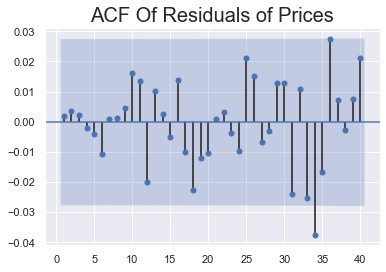

In [188]:
df_train['res_mv_ar_5_ma_6'] = results_mv_ar_5_ma_6.resid
sgt.plot_acf(df_train.res_mv_ar_5_ma_6, zero = False, lags = 40)
plt.title("ACF Of Residuals of Prices",size=20)
plt.show()

## ARMA for Returns vs ARMA for Prices

In [189]:
print("ARMA(5,6):  \t LL = ", results_mv_ar_5_ma_6.llf, "\t AIC = ", results_mv_ar_5_ma_6.aic)
print("ARMA(5,1): \tLL = ", result_ar_5_ma_1.llf, "\tAIC = ", result_ar_5_ma_1.aic)

ARMA(5,6):  	 LL =  -27582.864216881622 	 AIC =  55191.728433763245
ARMA(5,1): 	LL =  -7889.311282946238 	AIC =  15794.622565892476


**ARMA model works well with stationary data. ARMA(5,1) is better**

## ARIMA (The Autoregressive Integrated Moving Average Model)

In [190]:
# Import package

from statsmodels.tsa.arima_model import ARIMA

In [191]:
# Create a function for arima model
def arima_summary(p,d,q,data,start_ar_lags=None):
    model_ar_i_ma = ARIMA(data,order=(p,d,q))
    result_ar_i_ma = model_ar_i_ma.fit(start_ar_lags=start_ar_lags)
    print(result_ar_i_ma.summary())
    return  model_ar_i_ma, result_ar_i_ma

In [192]:
def arima_model_result(p,d,q,data,start_ar_lags=None):
    model_ar_i_ma = ARIMA(data,order=(p,d,q))
    result_ar_i_ma = model_ar_i_ma.fit(start_ar_lags=start_ar_lags)
    return result_ar_i_ma 
    
    

In [193]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit(start_ar_lags = 11).llf
    L2 = mod_2.fit(start_ar_lags = 11).llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [194]:
def LLR_test_arima(p1,d1,q1,p2,d2,q2,data,DF=1): # i and j are the period of time, DF is frequency
    
    model_ar_1_ma_1 = ARIMA(data, order=(p1,d1,q1)) 
    # LLF for model 
    L1 = model_ar_1_ma_1.fit().llf
    
  
    model_ar_2_ma_2 = ARIMA(data, order=(p2,d2,q2))
    # LLF for model 
    L2 =  model_ar_2_ma_2.fit().llf
    
    # Calculate the Logliklihood ratio 
    
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

### Simple ARIMA(1,1,1)

In [195]:
model_mv_ar_1_i_1_ma_1, result_mv_ar_1_i_1_ma_1 = arima_summary(1,1,1,df_train.market_value)

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 5019
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27598.660
Method:                       css-mle   S.D. of innovations             59.139
Date:                Sun, 12 Apr 2020   AIC                          55205.320
Time:                        21:59:12   BIC                          55231.404
Sample:                    01-11-1994   HQIC                         55214.460
                         - 04-05-2013                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5667      0.682      0.830      0.406      -0.771       1.904
ar.L1.D.market_value     0.7474      0.070     10.648      0.000       0.610       0.885
ma.L1.D.mark

### Residuals of ARIMA(1,1,1)

In [196]:
# Create residual column
df_train["res_mv_ar_1_i_1_ma_1"]= result_mv_ar_1_i_1_ma_1.resid

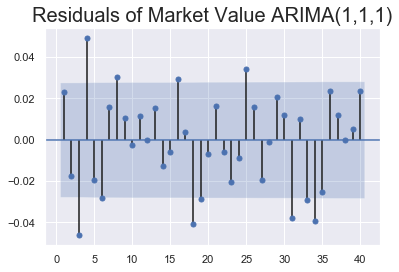

In [197]:
# Plot ACF
sgt.plot_acf(df_train.res_mv_ar_1_i_1_ma_1[1:],zero=False,lags=40)
plt.title("Residuals of Market Value ARIMA(1,1,1)",size=20)
plt.show()

**We see that 3rd and 4th lags are highly significant**

# Higher lag model

**Lets implement ARIMA(1,1,2) to ARIMA(3,1,2) models.**

In [198]:
model_mv_ar_1_i_1_ma_2,result_mv_ar_1_i_1_ma_2 = arima_summary(1,1,2,df_train.market_value)

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 5019
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -27595.075
Method:                       css-mle   S.D. of innovations             59.097
Date:                Sun, 12 Apr 2020   AIC                          55200.150
Time:                        21:59:15   BIC                          55232.755
Sample:                    01-11-1994   HQIC                         55211.575
                         - 04-05-2013                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5670      0.692      0.819      0.413      -0.789       1.923
ar.L1.D.market_value     0.5884      0.100      5.886      0.000       0.392       0.784
ma.L1.D.mark

In [199]:
model_mv_ar_1_i_1_ma_3,result_mv_ar_1_i_1_ma_3 = arima_summary(1,1,3,df_train.market_value)

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 5019
Model:                 ARIMA(1, 1, 3)   Log Likelihood              -27585.412
Method:                       css-mle   S.D. of innovations             58.983
Date:                Sun, 12 Apr 2020   AIC                          55182.823
Time:                        21:59:17   BIC                          55221.949
Sample:                    01-11-1994   HQIC                         55196.534
                         - 04-05-2013                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5670      0.723      0.784      0.433      -0.850       1.984
ar.L1.D.market_value    -0.3586      0.125     -2.880      0.004      -0.603      -0.115
ma.L1.D.mark

In [200]:
model_mv_ar_2_i_1_ma_1,result_mv_ar_2_i_1_ma_1 = arima_summary(2,1,1,df_train.market_value)

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 5019
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -27594.800
Method:                       css-mle   S.D. of innovations             59.094
Date:                Sun, 12 Apr 2020   AIC                          55199.601
Time:                        21:59:20   BIC                          55232.206
Sample:                    01-11-1994   HQIC                         55211.026
                         - 04-05-2013                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5670      0.694      0.817      0.414      -0.793       1.927
ar.L1.D.market_value     0.6297      0.094      6.704      0.000       0.446       0.814
ar.L2.D.mark

In [201]:
model_mv_ar_2_i_1_ma_2,result_mv_ar_2_i_1_ma_2 = arima_summary(2,1,2,df_train.market_value)

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 5019
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -27594.458
Method:                       css-mle   S.D. of innovations             59.090
Date:                Sun, 12 Apr 2020   AIC                          55200.915
Time:                        21:59:24   BIC                          55240.041
Sample:                    01-11-1994   HQIC                         55214.626
                         - 04-05-2013                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5671      0.699      0.811      0.417      -0.803       1.937
ar.L1.D.market_value     0.7883      0.249      3.168      0.002       0.301       1.276
ar.L2.D.mark

In [202]:
model_mv_ar_3_i_1_ma_1,result_mv_ar_3_i_1_ma_1 = arima_summary(3,1,1,df_train.market_value)

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 5019
Model:                 ARIMA(3, 1, 1)   Log Likelihood              -27587.042
Method:                       css-mle   S.D. of innovations             59.003
Date:                Sun, 12 Apr 2020   AIC                          55186.085
Time:                        21:59:26   BIC                          55225.211
Sample:                    01-11-1994   HQIC                         55199.795
                         - 04-05-2013                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5658      0.741      0.764      0.445      -0.886       2.017
ar.L1.D.market_value    -0.4066      0.121     -3.359      0.001      -0.644      -0.169
ar.L2.D.mark

In [203]:
model_mv_ar_3_i_1_ma_2,result_mv_ar_3_i_1_ma_2 = arima_summary(3,1,2,df_train.market_value,start_ar_lags=5)

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 5019
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -27585.647
Method:                       css-mle   S.D. of innovations             58.986
Date:                Sun, 12 Apr 2020   AIC                          55185.294
Time:                        21:59:28   BIC                          55230.940
Sample:                    01-11-1994   HQIC                         55201.289
                         - 04-05-2013                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5645      0.766      0.737      0.461      -0.936       2.065
ar.L1.D.market_value    -0.5775      0.122     -4.747      0.000      -0.816      -0.339
ar.L2.D.mark

In [204]:
# Lets check LL and aic of these models
print("ARIMA(1,1,1):  \t LL = ", result_mv_ar_1_i_1_ma_1.llf, "\t AIC = ", result_mv_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2):  \t LL = ", result_mv_ar_1_i_1_ma_2.llf, "\t AIC = ", result_mv_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3):  \t LL = ", result_mv_ar_1_i_1_ma_3.llf, "\t AIC = ", result_mv_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1):  \t LL = ", result_mv_ar_2_i_1_ma_1.llf, "\t AIC = ", result_mv_ar_2_i_1_ma_1.aic)
print("ARIMA(2,1,2):  \t LL = ", result_mv_ar_2_i_1_ma_2.llf, "\t AIC = ", result_mv_ar_2_i_1_ma_2.aic)
print("ARIMA(3,1,1):  \t LL = ", result_mv_ar_3_i_1_ma_1.llf, "\t AIC = ", result_mv_ar_3_i_1_ma_1.aic)
print("ARIMA(3,1,2):  \t LL = ", result_mv_ar_3_i_1_ma_2.llf, "\t AIC = ", result_mv_ar_3_i_1_ma_2.aic)

ARIMA(1,1,1):  	 LL =  -27598.65983172262 	 AIC =  55205.31966344524
ARIMA(1,1,2):  	 LL =  -27595.074830617035 	 AIC =  55200.14966123407
ARIMA(1,1,3):  	 LL =  -27585.411591819346 	 AIC =  55182.82318363869
ARIMA(2,1,1):  	 LL =  -27594.800302526015 	 AIC =  55199.60060505203
ARIMA(2,1,2):  	 LL =  -27594.45766080044 	 AIC =  55200.91532160088
ARIMA(3,1,1):  	 LL =  -27587.042354980218 	 AIC =  55186.084709960436
ARIMA(3,1,2):  	 LL =  -27585.646797668818 	 AIC =  55185.293595337636


**Among them ARIMA(1,1,3) has higher liklihood and lower AIC**

In [205]:
# LLR test betwwen ARIMA(1,1,2) and ARIMA(1,1,3)
print("\nLLR test p-value between  ARIMA(1,1,2) and ARIMA(1,1,3) = " + str(LLR_test_arima(1,1,2, 1,1,3,df_train.market_value)))


LLR test p-value between  ARIMA(1,1,2) and ARIMA(1,1,3) = 0.0


In [206]:
# LLR test betwwen ARIMA(1,1,1) and ARIMA(1,1,3)
print("\nLLR test p-value between  ARIMA(1,1,1) and ARIMA(1,1,3) = " + str(LLR_test_arima(1,1,1, 1,1,3,df_train.market_value,DF=2)))


LLR test p-value between  ARIMA(1,1,1) and ARIMA(1,1,3) = 0.0


**ARIMA(1,1,3) gives better result**

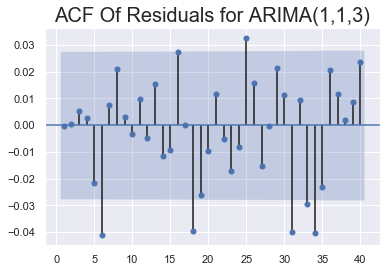

In [207]:
# plot ACF of residuals of ARIMA(1,1,3)
df_train['res_mv_ar_1_i_1_ma_3'] = result_mv_ar_1_i_1_ma_3.resid
sgt.plot_acf(df_train.res_mv_ar_1_i_1_ma_3[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,3)", size=20)
plt.show()

**We see fewer lags has significant coefficient comparison with simple arima residuals. However the 6th one still highly significant therefore therere might exist the better model, which goes up to 6 lag back. So we must check upto ARIMA(1,1,1) to ARIMA(6,1,6)**

### Lets train those model and go through summary

In [208]:
def arima(p,d,q,data,start_ar_lags=None):
    model_ar_i_ma = ARIMA(data,order=(p,d,q))
    result_ar_i_ma = model_ar_i_ma.fit(start_ar_lags=start_ar_lags)
    print(result_ar_i_ma.summary())
    

In [209]:
# Check summary ARIMA(4,1,1) to ARIMA (4,1,6)
for q in range(1,7):
    arima(4,1,q,df_train.market_value,start_ar_lags=11)

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 5019
Model:                 ARIMA(4, 1, 1)   Log Likelihood              -27586.935
Method:                       css-mle   S.D. of innovations             59.001
Date:                Sun, 12 Apr 2020   AIC                          55187.870
Time:                        21:59:38   BIC                          55233.517
Sample:                    01-11-1994   HQIC                         55203.865
                         - 04-05-2013                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5657      0.745      0.759      0.448      -0.895       2.026
ar.L1.D.market_value    -0.3283      0.205     -1.602      0.109      -0.730       0.073
ar.L2.D.mark

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 5019
Model:                 ARIMA(4, 1, 5)   Log Likelihood              -27575.359
Method:                       css-mle   S.D. of innovations             58.865
Date:                Sun, 12 Apr 2020   AIC                          55172.718
Time:                        22:00:17   BIC                          55244.449
Sample:                    01-11-1994   HQIC                         55197.854
                         - 04-05-2013                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5672      0.699      0.811      0.417      -0.803       1.938
ar.L1.D.market_value     0.1100      0.153      0.721      0.471      -0.189       0.409
ar.L2.D.mark

In [210]:
result_mv_ar_4_i_1_ma_1 = arima_model_result(4,1,1,df_train.market_value,start_ar_lags=11)
result_mv_ar_4_i_1_ma_2 = arima_model_result(4,1,2,df_train.market_value,start_ar_lags=11)
result_mv_ar_4_i_1_ma_3 = arima_model_result(4,1,3,df_train.market_value,start_ar_lags=11)
result_mv_ar_4_i_1_ma_4 = arima_model_result(4,1,4,df_train.market_value,start_ar_lags=11)
result_mv_ar_4_i_1_ma_5 = arima_model_result(4,1,5,df_train.market_value,start_ar_lags=11)
result_mv_ar_4_i_1_ma_6 = arima_model_result(4,1,6,df_train.market_value,start_ar_lags=11)

In [211]:
# Lets check LL and aic of these models
print("ARIMA(4,1,1):  \t LL = ", result_mv_ar_4_i_1_ma_1.llf, "\t AIC = ", result_mv_ar_4_i_1_ma_1.aic)
print("ARIMA(4,1,2):  \t LL = ", result_mv_ar_4_i_1_ma_2.llf, "\t AIC = ", result_mv_ar_4_i_1_ma_2.aic)
print("ARIMA(4,1,3):  \t LL = ", result_mv_ar_4_i_1_ma_3.llf, "\t AIC = ", result_mv_ar_4_i_1_ma_3.aic)
print("ARIMA(4,1,4):  \t LL = ", result_mv_ar_4_i_1_ma_4.llf, "\t AIC = ", result_mv_ar_4_i_1_ma_4.aic)
print("ARIMA(4,1,5):  \t LL = ", result_mv_ar_4_i_1_ma_5.llf, "\t AIC = ", result_mv_ar_4_i_1_ma_5.aic)
print("ARIMA(4,1,6):  \t LL = ", result_mv_ar_4_i_1_ma_6.llf, "\t AIC = ", result_mv_ar_4_i_1_ma_6.aic)

ARIMA(4,1,1):  	 LL =  -27586.934988828547 	 AIC =  55187.869977657094
ARIMA(4,1,2):  	 LL =  -27585.73531447823 	 AIC =  55187.47062895646
ARIMA(4,1,3):  	 LL =  -27581.38749699555 	 AIC =  55180.7749939911
ARIMA(4,1,4):  	 LL =  -27580.834837740607 	 AIC =  55181.669675481215
ARIMA(4,1,5):  	 LL =  -27575.35902240571 	 AIC =  55172.71804481142
ARIMA(4,1,6):  	 LL =  -27575.914691506776 	 AIC =  55175.82938301355


In [212]:
# Check summary ARIMA(5,1,1) to ARIMA (5,1,6)
for q in range(1,7):
    arima(5,1,q,df_train.market_value,start_ar_lags=11)

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 5019
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -27581.503
Method:                       css-mle   S.D. of innovations             58.937
Date:                Sun, 12 Apr 2020   AIC                          55179.007
Time:                        22:01:27   BIC                          55231.174
Sample:                    01-11-1994   HQIC                         55197.287
                         - 04-05-2013                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5678      0.691      0.822      0.411      -0.786       1.921
ar.L1.D.market_value     0.4009      0.159      2.527      0.012       0.090       0.712
ar.L2.D.mark

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 5019
Model:                 ARIMA(5, 1, 4)   Log Likelihood              -27575.950
Method:                       css-mle   S.D. of innovations             58.872
Date:                Sun, 12 Apr 2020   AIC                          55173.900
Time:                        22:01:59   BIC                          55245.631
Sample:                    01-11-1994   HQIC                         55199.036
                         - 04-05-2013                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5671      0.701      0.809      0.419      -0.807       1.941
ar.L1.D.market_value     0.1923      0.150      1.284      0.199      -0.101       0.486
ar.L2.D.mark

In [213]:
result_mv_ar_5_i_1_ma_1 = arima_model_result(5,1,1,df_train.market_value,start_ar_lags=11)
result_mv_ar_5_i_1_ma_2 = arima_model_result(5,1,2,df_train.market_value,start_ar_lags=11)
result_mv_ar_5_i_1_ma_3 = arima_model_result(5,1,3,df_train.market_value,start_ar_lags=11)
result_mv_ar_5_i_1_ma_4 = arima_model_result(5,1,4,df_train.market_value,start_ar_lags=11)
result_mv_ar_5_i_1_ma_5 = arima_model_result(5,1,5,df_train.market_value,start_ar_lags=11)
result_mv_ar_5_i_1_ma_6 = arima_model_result(5,1,6,df_train.market_value,start_ar_lags=11)

In [214]:
# Lets check LL and aic of these models
print("ARIMA(5,1,1):  \t LL = ", result_mv_ar_5_i_1_ma_1.llf, "\t AIC = ", result_mv_ar_5_i_1_ma_1.aic)
print("ARIMA(5,1,2):  \t LL = ", result_mv_ar_5_i_1_ma_2.llf, "\t AIC = ", result_mv_ar_5_i_1_ma_2.aic)
print("ARIMA(5,1,3):  \t LL = ", result_mv_ar_5_i_1_ma_3.llf, "\t AIC = ", result_mv_ar_5_i_1_ma_3.aic)
print("ARIMA(5,1,4):  \t LL = ", result_mv_ar_5_i_1_ma_4.llf, "\t AIC = ", result_mv_ar_5_i_1_ma_4.aic)
print("ARIMA(5,1,5):  \t LL = ", result_mv_ar_5_i_1_ma_5.llf, "\t AIC = ", result_mv_ar_5_i_1_ma_5.aic)
print("ARIMA(5,1,6):  \t LL = ", result_mv_ar_5_i_1_ma_6.llf, "\t AIC = ", result_mv_ar_5_i_1_ma_6.aic)

ARIMA(5,1,1):  	 LL =  -27581.503263270075 	 AIC =  55179.00652654015
ARIMA(5,1,2):  	 LL =  -27579.12215230002 	 AIC =  55176.24430460004
ARIMA(5,1,3):  	 LL =  -27578.450959327587 	 AIC =  55176.901918655174
ARIMA(5,1,4):  	 LL =  -27575.949995143405 	 AIC =  55173.89999028681
ARIMA(5,1,5):  	 LL =  -27574.889928335924 	 AIC =  55173.77985667185
ARIMA(5,1,6):  	 LL =  -27574.967290624445 	 AIC =  55175.93458124889


**ARIMA(5,1,1) gives us better coefficient.**

In [215]:
# Check summary ARIMA(6,1,1) to ARIMA (6,1,6)
for q in range(1,7):
    arima(6,1,q,df_train.market_value,start_ar_lags=13)

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 5019
Model:                 ARIMA(6, 1, 1)   Log Likelihood              -27579.111
Method:                       css-mle   S.D. of innovations             58.909
Date:                Sun, 12 Apr 2020   AIC                          55176.222
Time:                        22:04:02   BIC                          55234.911
Sample:                    01-11-1994   HQIC                         55196.788
                         - 04-05-2013                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5680      0.690      0.823      0.411      -0.785       1.921
ar.L1.D.market_value    -0.1225      0.252     -0.486      0.627      -0.616       0.371
ar.L2.D.mark

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 5019
Model:                 ARIMA(6, 1, 4)   Log Likelihood              -27575.646
Method:                       css-mle   S.D. of innovations             58.868
Date:                Sun, 12 Apr 2020   AIC                          55175.292
Time:                        22:04:46   BIC                          55253.543
Sample:                    01-11-1994   HQIC                         55202.712
                         - 04-05-2013                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5662      0.696      0.813      0.416      -0.799       1.931
ar.L1.D.market_value     0.4595      0.355      1.295      0.195      -0.236       1.155
ar.L2.D.mark

In [216]:
result_mv_ar_6_i_1_ma_1 = arima_model_result(6,1,1,df_train.market_value,start_ar_lags=13)
result_mv_ar_6_i_1_ma_2 = arima_model_result(6,1,2,df_train.market_value,start_ar_lags=13)
result_mv_ar_6_i_1_ma_3 = arima_model_result(6,1,3,df_train.market_value,start_ar_lags=13)
result_mv_ar_6_i_1_ma_4 = arima_model_result(6,1,4,df_train.market_value,start_ar_lags=13)
result_mv_ar_6_i_1_ma_5 = arima_model_result(6,1,5,df_train.market_value,start_ar_lags=13)
result_mv_ar_6_i_1_ma_6 = arima_model_result(6,1,6,df_train.market_value,start_ar_lags=13)

In [217]:
# Lets check LL and aic of these models
print("ARIMA(6,1,1):  \t LL = ", result_mv_ar_6_i_1_ma_1.llf, "\t AIC = ", result_mv_ar_6_i_1_ma_1.aic)
print("ARIMA(6,1,2):  \t LL = ", result_mv_ar_6_i_1_ma_2.llf, "\t AIC = ", result_mv_ar_6_i_1_ma_2.aic)
print("ARIMA(6,1,3):  \t LL = ", result_mv_ar_6_i_1_ma_3.llf, "\t AIC = ", result_mv_ar_6_i_1_ma_3.aic)
print("ARIMA(6,1,4):  \t LL = ", result_mv_ar_6_i_1_ma_4.llf, "\t AIC = ", result_mv_ar_6_i_1_ma_4.aic)
print("ARIMA(6,1,5):  \t LL = ", result_mv_ar_6_i_1_ma_5.llf, "\t AIC = ", result_mv_ar_6_i_1_ma_5.aic)
print("ARIMA(6,1,6):  \t LL = ", result_mv_ar_6_i_1_ma_6.llf, "\t AIC = ", result_mv_ar_6_i_1_ma_6.aic)

ARIMA(6,1,1):  	 LL =  -27579.111126457687 	 AIC =  55176.22225291537
ARIMA(6,1,2):  	 LL =  -27578.5200672285 	 AIC =  55177.040134457
ARIMA(6,1,3):  	 LL =  -27576.588189446848 	 AIC =  55175.176378893695
ARIMA(6,1,4):  	 LL =  -27575.645777013888 	 AIC =  55175.291554027775
ARIMA(6,1,5):  	 LL =  -27574.886104670994 	 AIC =  55175.77220934199
ARIMA(6,1,6):  	 LL =  -27573.895294159378 	 AIC =  55175.790588318756


**ARIMA(6,1,3) has better coefficient.**

**We got 3 MODEL ARIMA(1,1,3) ARIMA(5,1,1) and ARIMA(6,1,3) which give us better coefficient. and comparatively better LL and aic. Lets compare these 3 with each other**

In [218]:
print("ARIMA(1,1,3):  \t LL = ", result_mv_ar_1_i_1_ma_3.llf, "\t AIC = ", result_mv_ar_1_i_1_ma_3.aic)
print("ARIMA(5,1,1):  \t LL = ", result_mv_ar_5_i_1_ma_1.llf, "\t AIC = ", result_mv_ar_5_i_1_ma_1.aic)
print("ARIMA(6,1,3):  \t LL = ", result_mv_ar_6_i_1_ma_3.llf, "\t AIC = ", result_mv_ar_6_i_1_ma_3.aic)

ARIMA(1,1,3):  	 LL =  -27585.411591819346 	 AIC =  55182.82318363869
ARIMA(5,1,1):  	 LL =  -27581.503263270075 	 AIC =  55179.00652654015
ARIMA(6,1,3):  	 LL =  -27576.588189446848 	 AIC =  55175.176378893695


**Model ARIMA(6,1,3) has higher LL and lower aic.**

In [219]:
# LLR test among them
LLR_test_arima(1,1,3,6,1,3,df_train.market_value,DF=5)

0.003

In [220]:
# LLR test among them
LLR_test_arima(5,1,1,6,1,3,df_train.market_value,DF=3)

0.02

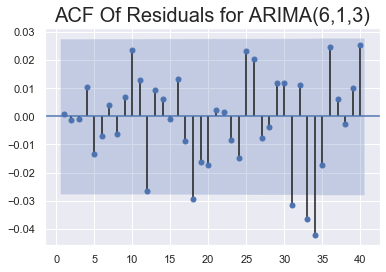

In [221]:
df_train['res_ar_6_i_1_ma_3'] = result_mv_ar_6_i_1_ma_3.resid
sgt.plot_acf(df_train.res_ar_6_i_1_ma_3[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(6,1,3)", size=20)
plt.show()

**We see some significant coefficient and many lags after 30. But we know the further back time we go, the less the value become.If we include up to 34 lags back into the model we will able to get White noise. But on the other hand we want this model to be able to predict other time series data as well. Taking 34 lags the model parameters becoming too dependent on the data set which known as Overfitting. Overfitting takes away the predicting power. So we choose ARIMA(6,1,3) as the better model**

### Models with higher level of intigrations

**We only rely on intigration when time-series doesn't come from stationary process. If a single layer integration accomplishes this,any aditional are unnecessary**

#### How do we know integraded data is stationary?

1. Manually create an integrated version of the original time series

2. Use the augmented dicky-fuller test

In [222]:
df_train["delta_prices"] = df_train.market_value.diff(1) # diff(1) The difference between values 1 period apart

In [223]:
model_delta_ar_1_i_1_ma_1 = ARIMA(df_train.delta_prices[1:], order=(1,0,1))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
results_delta_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 5019
Model:                     ARMA(1, 1)   Log Likelihood              -27598.660
Method:                       css-mle   S.D. of innovations             59.139
Date:                Sun, 12 Apr 2020   AIC                          55205.320
Time:                        22:08:09   BIC                          55231.404
Sample:                    01-11-1994   HQIC                         55214.460
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5667      0.682      0.830      0.406      -0.771       1.904
ar.L1.delta_prices     0.7474      0.070     10.648      0.000       0.610       0.885
ma.L1.delta_prices    -0.7935      0.064    -12.374      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3379           +0.0000j            1.3379            0.0000
MA.1            1.2602           +0.0000j            1.2602            0.0000
-----------------------------------------------------------------------------
"""

In [224]:
sts.adfuller(df_train.delta_prices[1:])

(-32.238943106931266,
 0.0,
 5,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 54834.31732499655)

**Test statistics -32.24409349570744 which is 10 times greater in absolute value the the critical 1% value -3.4316548765428174. Moreover the p value is 0.0. Which confirms stationarity.**

### That means , No needs of additional layers of integration

# ARIMAX

In [225]:
def arimax_summary(p,d,q,data,exg):
    model_mv_ar_1_i_1_ma_1_X = ARIMA(data,exog =exg , order=(p,d,q))
    results_mv_ar_1_i_1_ma_1_X = model_mv_ar_1_i_1_ma_1_X.fit()
    print(results_mv_ar_1_i_1_ma_1_X.summary())
    

In [226]:
# Exog = spx
arimax_summary(1,1,1,df_train.market_value,df_train.spx)

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 5019
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27598.551
Method:                       css-mle   S.D. of innovations             59.138
Date:                Sun, 12 Apr 2020   AIC                          55207.102
Time:                        22:08:12   BIC                          55239.707
Sample:                    01-11-1994   HQIC                         55218.527
                         - 04-05-2013                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6269      2.657     -0.236      0.813      -5.835       4.581
spx                      0.0011      0.002      0.465      0.642      -0.004       0.006
ar.L1.D.mark

In [227]:
# Exog = nikkei
arimax_summary(1,1,1,df_train.market_value,df_train.nikkei)

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 5019
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27598.613
Method:                       css-mle   S.D. of innovations             59.139
Date:                Sun, 12 Apr 2020   AIC                          55207.226
Time:                        22:08:14   BIC                          55239.831
Sample:                    01-11-1994   HQIC                         55218.652
                         - 04-05-2013                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0373      2.446     -0.015      0.988      -4.831       4.756
nikkei                4.423e-05      0.000      0.261      0.794      -0.000       0.000
ar.L1.D.mark

In [228]:
# Exog = DAX
arimax_summary(1,1,1,df_train.market_value,df_train.dax)

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 5019
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27598.655
Method:                       css-mle   S.D. of innovations             59.139
Date:                Sun, 12 Apr 2020   AIC                          55207.310
Time:                        22:08:17   BIC                          55239.915
Sample:                    01-11-1994   HQIC                         55218.736
                         - 04-05-2013                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8329      2.107      0.395      0.693      -3.297       4.963
dax                  -5.205e-05      0.000     -0.130      0.896      -0.001       0.001
ar.L1.D.mark

# SARIMAX

**Use on seasonality data**

In [229]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [230]:
def sarimax_summary(p,d,q,P,D,Q,s,data,exg):
    model_sarimax = SARIMAX(data, exog = exg, order=(p,d,q), seasonal_order = (P,D,Q,s))
    results_sarimax = model_sarimax.fit()
    print(results_sarimax.summary())

In [231]:
sarimax_summary(1,0,1,2,0,1,5,df_train.market_value,df_train.spx)

                                 Statespace Model Results                                
Dep. Variable:                      market_value   No. Observations:                 5020
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26706.946
Date:                           Sun, 12 Apr 2020   AIC                          53427.892
Time:                                   22:08:51   BIC                          53473.541
Sample:                               01-10-1994   HQIC                         53443.888
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.7061      0.036     76.209      0.000       2.636       2.776
ar.L1          0.9997      0.001   1781.178

In [232]:
sarimax_summary(1,0,1,2,0,1,5,df_train.market_value,df_train.dax)

                                 Statespace Model Results                                
Dep. Variable:                      market_value   No. Observations:                 5020
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -25065.506
Date:                           Sun, 12 Apr 2020   AIC                          50145.012
Time:                                   22:09:07   BIC                          50190.661
Sample:                               01-10-1994   HQIC                         50161.008
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
dax            0.6337      0.004    149.434      0.000       0.625       0.642
ar.L1          0.9989      0.001   1630.255

In [233]:
sarimax_summary(1,0,1,2,0,1,5,df_train.market_value,df_train.nikkei)

                                 Statespace Model Results                                
Dep. Variable:                      market_value   No. Observations:                 5020
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -27434.497
Date:                           Sun, 12 Apr 2020   AIC                          54882.993
Time:                                   22:09:37   BIC                          54928.641
Sample:                               01-10-1994   HQIC                         54898.989
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
nikkei         0.0842      0.003     24.452      0.000       0.077       0.091
ar.L1          0.9999      0.001   1309.771

# ARCH Model

In [234]:
# Creating squared returns
df_train["sq_returns"] = df_train.returns.mul(df_train.returns)

### Returns vs Squred returns

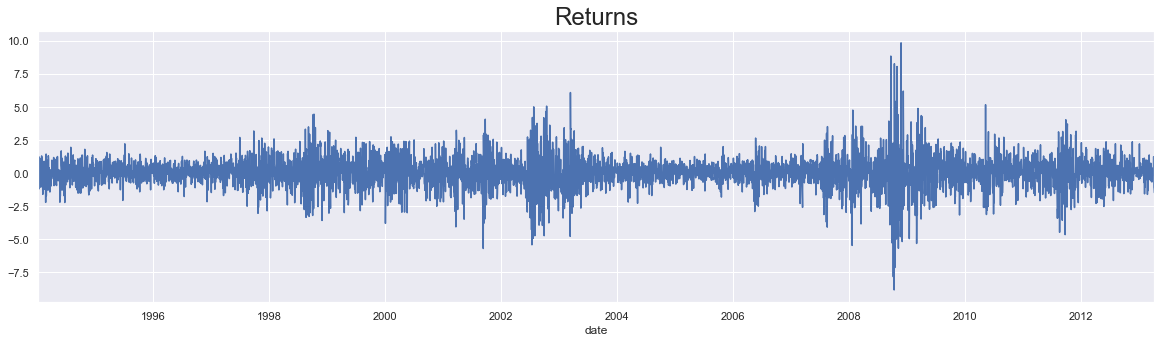

In [235]:
df_train.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()

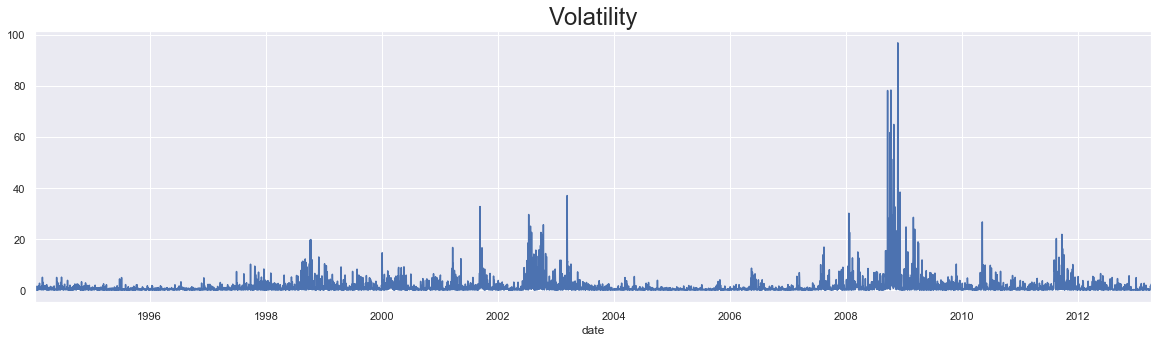

In [236]:
df_train.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

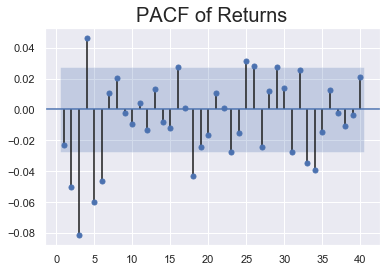

In [237]:
sgt.plot_pacf(df_train.returns, lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

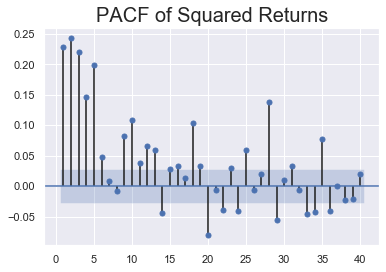

In [238]:
sgt.plot_pacf(df_train.sq_returns, lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

### The Arch_model method

In [239]:
from arch import arch_model

In [240]:
def arch_summary(data,mean = "Constant", vol = "Garch", p = 1,update_freq = 1):
    model_arch_1 = arch_model(data, mean = mean, vol = vol, p = p)
    results_arch_1 = model_arch_1.fit(update_freq = update_freq)
    print(results_arch_1.summary())

In [243]:
arch_summary(df_train.returns,update_freq=1)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6987.996939333616
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6984.811181080089
Iteration:      3,   Func. Count:     25,   Neg. LLF: 6982.851348555168
Iteration:      4,   Func. Count:     32,   Neg. LLF: 6974.872814051393
Iteration:      5,   Func. Count:     39,   Neg. LLF: 6972.734736835859
Iteration:      6,   Func. Count:     46,   Neg. LLF: 6971.647375239638
Iteration:      7,   Func. Count:     53,   Neg. LLF: 6970.755806242594
Iteration:      8,   Func. Count:     60,   Neg. LLF: 6970.289550003461
Iteration:      9,   Func. Count:     67,   Neg. LLF: 6970.132426204183
Iteration:     10,   Func. Count:     73,   Neg. LLF: 6970.088042271316
Iteration:     11,   Func. Count:     79,   Neg. LLF: 6970.058478429418
Iteration:     12,   Func. Count:     85,   Neg. LLF: 6970.058367485686
Iteration:     13,   Func. Count:     91,   Neg. LLF: 6970.058366189178
Optimization terminated successfully.    (Exit mode 0)
         

**Mean model : constant mean that means the mean is constant rather than moving. Vol Model : GARCH that means a diiferent type of model for variance equation.. Distribution: Normal that means the distribution of residuals .Method: Maximum Likelihood (how we found the coefficients which is maximum likelihood in this case.) Df Model: 4 (The number of degrees of freedom this particular model has.The number of coefficients we trying to estimate)**

### Simple ARCH(1)

In [242]:
arch_summary(df_train.returns,vol="ARCH")

Iteration:      1,   Func. Count:      5,   Neg. LLF: 7661.953060893903
Iteration:      2,   Func. Count:     14,   Neg. LLF: 7661.175116935157
Iteration:      3,   Func. Count:     22,   Neg. LLF: 7660.278630806879
Iteration:      4,   Func. Count:     29,   Neg. LLF: 7660.098463946289
Iteration:      5,   Func. Count:     34,   Neg. LLF: 7660.088789377838
Iteration:      6,   Func. Count:     39,   Neg. LLF: 7660.088782040906
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7660.088782040875
            Iterations: 6
            Function evaluations: 39
            Gradient evaluations: 6
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -7660.09
Distribution:                  Normal   AIC:

**Iteration : 6  this implies the specifications were loose enough, Our model is light and doesn't take too long to compute.**

**Both Adjusted and un adjusted R-squared value is - 0 That means the value is negative but its absoulute value is so very minute that we should round it to 0. R-Squared measurements of explanatory variation away from the mean. If the residuals are simply a version of the original data set, Where every value is decreased by a constant, then there will be no variance. So R-squared value = 0. R-squared is a userfull measure but not for ARCH model.**

**We see the  Log-Likelihood(the goodness of fit): -7660.09 is the higher then the ARMA and ARIMA model. Therefore, Even a simple ARCH model is better than the complex multilag ARIMA model.**

**If a P value has a number < -2 after the e-terms, it is significantly different from 0.**

**mu coefficient is significant**

**Both omega and alpha are significant**

**So, All 3 coefficients turn out to be significant. The loglikelihood is higher than that of any of the ARIMAX family we observed. ARCH(1) is the best estimator so far. But we have to remember The ARCH can only be used to predict future variance rather than future returns**